In [2]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup, Comment
import time
import sys
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from io import StringIO
import io
import copy

import numpy as np
import matplotlib.pyplot as plt


In [51]:
all_coaches_data = pd.read_csv('all_coaches_data.csv', encoding="utf-8-sig")
all_player_award_data = pd.read_csv('all_player_award_data.csv', encoding="utf-8-sig")
all_player_defense_data = pd.read_csv('all_player_defense_data.csv ', encoding="utf-8-sig")
all_player_kicking_data = pd.read_csv('all_player_kicking_data.csv', encoding="utf-8-sig")

all_player_passing_data = pd.read_csv('all_player_passing_data.csv', encoding="utf-8-sig")
all_player_receiving_data = pd.read_csv('all_player_receiving_data.csv', encoding="utf-8-sig")
all_player_rushing_data = pd.read_csv('all_player_rushing_data.csv', encoding="utf-8-sig")
all_team_advance_data = pd.read_csv('all_team_advance_data.csv', encoding="utf-8-sig")
all_team_defense_data = pd.read_csv('all_team_defense_data.csv', encoding="utf-8-sig")

all_team_games_data = pd.read_csv('all_team_games_data.csv', encoding="utf-8-sig")
all_team_index_custom = pd.read_csv('all_team_index_custom.csv', encoding="utf-8-sig")

all_team_offense_data = pd.read_csv('all_team_offense_data.csv', encoding="utf-8-sig")
all_team_passing_offense_data = pd.read_csv('all_team_passing_offense_data.csv', encoding="utf-8-sig")
all_team_pso_data = pd.read_csv('all_team_pso_data.csv', encoding="utf-8-sig")

### Converting Entire Player Database to Ranking - Not Necessary to Run

In [96]:
df = pd.read_csv("player_db.csv")
print(list(df))

['season', 'Player', 'Tm', 'Pos', 'team_id', 'playoff_games', 'champion', 'champion_share', 'mvp_shares', 'dpoy_shares', 'opoy_shares', 'all_pro', 'cpoy_shares', 'sum_mvp_shares', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_all_pro', 'sum_cpoy_shares', 'sum_champion_shares', 'sum_champions', 'sum_playoff_games', 'sum_mvp_shares_L4S', 'sum_dpoy_shares_L4S', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'pass_Tm', 'pass_Age', 'pass_Pos', 'pass_G', 'pass_GS', 'pass_QBrec', 'pass_Cmp', 'pass_Att', 'pass_Cmp%', 'pass_Yds', 'pass_TD', 'pass_TD%', 'pass_Int', 'pass_Int%', 'pass_1D', 'pass_Succ%', 'pass_Lng', 'pass_Y/A', 'pass_AY/A', 'pass_Y/C', 'pass_Y/G', 'pass_Rate', 'pass_QBR', 'pass_Sk', 'pass_Yds.1', 'pass_Sk%', 'pass_NY/A', 'pass_ANY/A', 'pass_4QC', 'pass_GWD', 'pass_team_id', 'pass_type', 'rec_Pos', 'rec_Tgt', 'rec_Rec', 'rec_Ctch%', 'rec_Yds', 'rec_Y/R', 'rec_TD', 'rec_1D', 'rec_Succ%', 'rec_Lng', 'rec_Y/Tgt', 'rec_R/G', 'rec_Y/G', 'rec_Fmb', 'rec_

In [97]:

df = df.fillna(0)

exclude_columns = ['season', 'Player', 'Tm', 'Pos', 'team_id', 'won_mvp', 'ns_won_mvp', 'ns_mvp_shares',  'pass_type','def_type','rec_type', 'kick_type', 'rush_type', 'pass_QBrec' ]

reverse_rank_columns = []

for col in df.columns:
    if col not in exclude_columns:
        if col in reverse_rank_columns:
            df[col] = df.groupby('season')[col].rank(method='min', ascending=True)
        else:
            df[col] = df.groupby('season')[col].rank(method='min', ascending=False)
            
df = df.sort_values(by=['season', 'mvp_shares'], ascending=[False, False])

df.to_csv("player_db_rk.csv",index=False, encoding="utf-8-sig")
print(list(df))

['season', 'Player', 'Tm', 'Pos', 'team_id', 'playoff_games', 'champion', 'champion_share', 'mvp_shares', 'dpoy_shares', 'opoy_shares', 'all_pro', 'cpoy_shares', 'sum_mvp_shares', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_all_pro', 'sum_cpoy_shares', 'sum_champion_shares', 'sum_champions', 'sum_playoff_games', 'sum_mvp_shares_L4S', 'sum_dpoy_shares_L4S', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'pass_Tm', 'pass_Age', 'pass_Pos', 'pass_G', 'pass_GS', 'pass_QBrec', 'pass_Cmp', 'pass_Att', 'pass_Cmp%', 'pass_Yds', 'pass_TD', 'pass_TD%', 'pass_Int', 'pass_Int%', 'pass_1D', 'pass_Succ%', 'pass_Lng', 'pass_Y/A', 'pass_AY/A', 'pass_Y/C', 'pass_Y/G', 'pass_Rate', 'pass_QBR', 'pass_Sk', 'pass_Yds.1', 'pass_Sk%', 'pass_NY/A', 'pass_ANY/A', 'pass_4QC', 'pass_GWD', 'pass_team_id', 'pass_type', 'rec_Pos', 'rec_Tgt', 'rec_Rec', 'rec_Ctch%', 'rec_Yds', 'rec_Y/R', 'rec_TD', 'rec_1D', 'rec_Succ%', 'rec_Lng', 'rec_Y/Tgt', 'rec_R/G', 'rec_Y/G', 'rec_Fmb', 'rec_

In [52]:

# List of DataFrames
dataframes = [
    all_player_award_data,
    all_player_defense_data,
    all_player_kicking_data,
    all_player_passing_data,
    all_player_receiving_data,
    all_player_rushing_data
]

for df in dataframes:
    # Create the new 'Player' column with the condition
    df['Player'] = df.apply(lambda row: f"QB {row['Player']}" if row['Pos'] == "QB" else row['Player'], axis=1)
    
# List of DataFrames
dataframes = [
    all_player_award_data,
    all_player_defense_data,
    all_player_kicking_data,
    all_player_passing_data,
    all_player_receiving_data,
    all_player_rushing_data
]

# Fill NaN values with 0 in each DataFrame
for df in dataframes:
    df.fillna(0, inplace=True)

### Merging/vlookup data | giving every df the team_id column

In [53]:
# List of DataFrames to clean
dataframes = {
    "all_team_pso_data": all_team_pso_data,
    "all_team_passing_offense_data": all_team_passing_offense_data,
    "all_team_offense_data": all_team_offense_data,
    "all_team_defense_data": all_team_defense_data,
    "all_team_advance_data": all_team_advance_data
}

# Cleaning and processing each DataFrame
for name, df in dataframes.items():
    # Drop rows where 'Team' is "0", blank, or NaN
    df = df[~df['Team'].isin(['0', '', None])]
    df = df.dropna(subset=['Team'])

    # Merge 'team_id' from 'all_team_index_custom' based on 'Team'
    df = df.merge(all_team_index_custom[['Team', 'team_id']], on='Team', how='left')

    # Ensure 'team_id' is rounded to the nearest whole number
    df['team_id'] = np.round(df['team_id']).astype('Int64')

    # Drop duplicates based on 'season' and 'team_id'
    df = df.drop_duplicates(subset=['season', 'team_id'])

    # Update the DataFrame in the dictionary
    dataframes[name] = df

# Unpack the cleaned DataFrames
all_team_pso_data = dataframes["all_team_pso_data"]
all_team_passing_offense_data = dataframes["all_team_passing_offense_data"]
all_team_offense_data = dataframes["all_team_offense_data"]
all_team_defense_data = dataframes["all_team_defense_data"]
all_team_advance_data = dataframes["all_team_advance_data"]

# Create a dictionary mapping 'Team' to 'team_id' from 'all_team_index_custom'
team_id_lookup = all_team_index_custom.set_index('Team')['team_id'].to_dict()

# Use the map function to return 'team_id' into 'all_player_award_data'
all_player_award_data['team_id'] = all_player_award_data['Team'].map(team_id_lookup)

# The 'team_id' column is now added to 'all_player_award_data'
# Ensure 'team_id' is rounded to the nearest whole number
all_player_award_data['team_id'] = np.round(all_player_award_data['team_id']).astype('Int64')


# Create a dictionary mapping 'team_abb' to 'team_id' from 'all_team_index_custom'
team_id_lookup = all_team_index_custom.set_index('team_abb')['team_id'].to_dict()

# List of DataFrames to update
dataframes = {
    "all_player_defense_data": all_player_defense_data,
    "all_player_kicking_data": all_player_kicking_data,
    "all_player_passing_data": all_player_passing_data,
    "all_player_receiving_data": all_player_receiving_data,
    "all_player_rushing_data": all_player_rushing_data,
    "all_coaches_data": all_coaches_data,

}

# Apply the VLOOKUP-like function and round the 'team_id' in each DataFrame
for name, df in dataframes.items():
    # Use the map function to return 'team_id' using 'Tm' as the key
    df['team_id'] = df['Tm'].map(team_id_lookup)

    # Ensure 'team_id' is rounded to the nearest whole number
    df['team_id'] = np.round(df['team_id']).astype('Int64')

    # Update the DataFrame in the dictionary
    dataframes[name] = df

# Unpack the cleaned DataFrames
all_player_defense_data = dataframes["all_player_defense_data"]
all_player_kicking_data = dataframes["all_player_kicking_data"]
all_player_passing_data = dataframes["all_player_passing_data"]
all_player_receiving_data = dataframes["all_player_receiving_data"]
all_player_rushing_data = dataframes["all_player_rushing_data"]
all_coaches_data = dataframes["all_coaches_data"]

#now every df has 'team_id' relationship

### Merging/vlookup data | team_offense, team_defense, team_passing_offense, team_pso INTO team_advance

In [54]:
#dfs have id relation to team, remember trades cannot be taken in account


# Merge columns from 'all_team_offense_data' into 'all_team_advance_data'
all_team_advance_data = all_team_advance_data.merge(
    all_team_offense_data[
        ['team_id', 'season', 'team_offense_G', 'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 
         'team_offense_Tot Yds & TO_Y/P', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 
         'team_offense_Tot Yds & TO_Cmp', 'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 
         'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 'team_offense_Passing_1stD', 'team_offense_Passing_Att', 
         'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD', 
         'team_offense_Penalties_Pen', 'team_offense_Penalties_Yds', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 
         'team_offense_TO%', 'team_offense_EXP']
    ], 
    on=['team_id', 'season'], 
    how='left'
)
# Drop duplicates after merge
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['season', 'team_id'])

# Merge columns from 'all_team_defense_data' into 'all_team_advance_data'
all_team_advance_data = all_team_advance_data.merge(
    all_team_defense_data[
        ['team_id', 'season', 'team_defense_G', 'team_defense_PA', 'team_defense_Tot Yds & TO_Yds', 'team_defense_Tot Yds & TO_Ply', 
         'team_defense_Tot Yds & TO_Y/P', 'team_defense_Tot Yds & TO_TO', 'team_defense_Tot Yds & TO_FL', 'team_defense_Tot Yds & TO_1stD', 
         'team_defense_Tot Yds & TO_Cmp', 'team_defense_Tot Yds & TO_Att', 'team_defense_Passing_Yds', 'team_defense_Passing_TD', 
         'team_defense_Passing_Int', 'team_defense_Passing_NY/A', 'team_defense_Passing_1stD', 'team_defense_Passing_Att', 
         'team_defense_Rushing_Yds', 'team_defense_Rushing_TD', 'team_defense_Rushing_Y/A', 'team_defense_Rushing_1stD', 
         'team_defense_Penalties_Pen', 'team_defense_Penalties_Yds', 'team_defense_Penalties_1stPy', 'team_defense_Sc%', 
         'team_defense_TO%', 'team_defense_EXP']
    ], 
    on=['team_id', 'season'], 
    how='left'
)
# Drop duplicates after merge
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['season', 'team_id'])

# Merge columns from 'all_team_passing_offense_data' into 'all_team_advance_data'
all_team_advance_data = all_team_advance_data.merge(
    all_team_passing_offense_data[
        ['team_id', 'season', 'passing_offense_G', 'passing_offense_Cmp', 'passing_offense_Att', 'passing_offense_Cmp%', 
         'passing_offense_Yds', 'passing_offense_TD', 'passing_offense_TD%', 'passing_offense_Int', 'passing_offense_Int%', 
         'passing_offense_Lng', 'passing_offense_Y/A', 'passing_offense_AY/A', 'passing_offense_Y/C', 'passing_offense_Y/G', 
         'passing_offense_Rate', 'passing_offense_Sk', 'passing_offense_Yds.1', 'passing_offense_Sk%', 'passing_offense_NY/A', 
         'passing_offense_ANY/A', 'passing_offense_4QC', 'passing_offense_GWD', 'passing_offense_EXP']
    ], 
    on=['team_id', 'season'], 
    how='left'
)
# Drop duplicates after merge
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['season', 'team_id'])

# Merge 'pso' column from 'all_team_pso_data' into 'all_team_advance_data'
all_team_advance_data = all_team_advance_data.merge(
    all_team_pso_data[['team_id', 'season', 'pso']], 
    on=['team_id', 'season'], 
    how='left'
)
# Drop duplicates after merge
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['season', 'team_id'])

# Create the 'champion' column in the all_team_advance_data DataFrame
all_team_advance_data['champion'] = (all_team_advance_data['champion_share'] == 1).astype(int)

# The 'champion' column will now have a value of 1 where 'champion_share' equals 1
# Drop the specified columns from 'all_team_advance_data'
columns_to_drop = ['T', 'passing_offense_Yds.1', 'team_offense_G', 'team_defense_G']
all_team_advance_data = all_team_advance_data.drop(columns=columns_to_drop)

all_team_advance_data

,season,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,...,passing_offense_Rate,passing_offense_Sk,passing_offense_Sk%,passing_offense_NY/A,passing_offense_ANY/A,passing_offense_4QC,passing_offense_GWD,passing_offense_EXP,pso,champion
0,2024,Kansas City Chiefs,6,0,1.0000,146,103,43,7.2,2.5,...,82.5,11,5.6,6.7,5.5,1.0,2.0,20.17,500,0
1,2024,Buffalo Bills,5,2,0.7140,199,136,63,9.0,-3.5,...,107.7,9,4.5,7.1,8.3,0.0,1.0,62.71,1600,0
2,2024,Pittsburgh Steelers,5,2,0.7140,161,101,60,8.6,0.0,...,96.6,17,8.2,6.1,6.6,0.0,1.0,39.02,5000,0
3,2024,Houston Texans,5,2,0.7140,165,159,6,0.9,0.0,...,93.9,21,8.0,6.0,6.1,1.0,2.0,43.92,1600,0
4,2024,Baltimore Ravens,4,2,0.6670,177,149,28,4.7,0.9,...,108.3,7,3.8,8.1,8.7,1.0,1.0,67.65,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,1990,Phoenix Cardinals,5,11,0.3125,268,396,-128,-8.0,1.3,...,71.9,43,8.9,5.9,4.9,1.0,1.0,0.00,20000,0
1085,1990,Los Angeles Rams,5,11,0.3125,345,412,-67,-4.2,-0.1,...,79.6,30,5.1,6.5,6.0,0.0,0.0,0.00,900,0
1086,1990,Atlanta Falcons,5,11,0.3125,348,365,-17,-1.1,-1.1,...,76.8,46,8.0,6.0,5.4,1.0,1.0,0.00,15000,0
1087,1990,Cleveland Browns,3,13,0.1875,228,462,-234,-14.6,1.7,...,61.5,42,6.8,5.1,3.9,1.0,1.0,0.00,1200,0


### Player Database

In [55]:

# Add the 'type' column to each DataFrame
all_player_defense_data['type'] = 'defense'
all_player_passing_data['type'] = 'passing'
all_player_rushing_data['type'] = 'rushing'
all_player_kicking_data['type'] = 'kicking'
all_player_receiving_data['type'] = 'receiving'

# Select the relevant columns from each DataFrame
defense_data = all_player_defense_data[['season', 'Player', 'Tm', 'Pos', 'team_id']]
passing_data = all_player_passing_data[['season', 'Player', 'Tm', 'Pos', 'team_id']]
rushing_data = all_player_rushing_data[['season', 'Player', 'Tm', 'Pos', 'team_id']]
kicking_data = all_player_kicking_data[['season', 'Player', 'Tm', 'Pos', 'team_id']]
receiving_data = all_player_receiving_data[['season', 'Player', 'Tm', 'Pos', 'team_id']]

# Concatenate the DataFrames together
combined_data = pd.concat([defense_data, passing_data, rushing_data, kicking_data, receiving_data], ignore_index=True)

# Display the combined DataFrame
combined_data = combined_data.fillna(0)
combined_data = combined_data.drop_duplicates(subset=['Player', 'season'])

# Merge the specified columns from all_team_advance_data into combined_data
combined_data = combined_data.merge(
    all_team_advance_data[['team_id', 'season', 'playoff_games', 'champion', 'champion_share']],
    on=['team_id', 'season'],
    how='left'
)

all_player_award_data = all_player_award_data.groupby(['Player', 'season'], as_index=False).sum()
all_player_award_data = all_player_award_data.sort_values(by='season', ascending=False)

In [56]:
# Sort the DataFrame back by 'season' in descending order
combined_data = combined_data.fillna(0)
combined_data = combined_data.sort_values(by='season', ascending=False)

# Merge the specified columns from all_team_advance_data into combined_data
combined_data = combined_data.merge(
    all_player_award_data[['Player', 'season', 'mvp_shares', 'dpoy_shares', 'opoy_shares', 'all_pro', 'cpoy_shares']],
    on=['Player', 'season'],
    how='left'
)

# Fill NaN values with 0
combined_data = combined_data.fillna(0)

# Sort the DataFrame back by 'season' in descending order
combined_data = combined_data.sort_values(by='season', ascending=False)

combined_data = combined_data.drop_duplicates(subset=['Player', 'season'])

combined_data

,season,Player,Tm,Pos,team_id,playoff_games,champion,champion_share,mvp_shares,dpoy_shares,opoy_shares,all_pro,cpoy_shares
0,2024,Aidan Hutchinson,DET,DL,22,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
978,2024,George Karlaftis III,KAN,DE,1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
976,2024,Jared Verse,LAR,OLB,30,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
975,2024,Will Anderson,HOU,DE,16,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
974,2024,Leonard Floyd,SFO,DL,19,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52207,1990,Johnny Meads,HOU,RLB,16,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
52208,1990,Dave Meggett,NYG,RB,21,4.0,1.0,1.00,0.0,0.0,0.0,1.0,0.0
52209,1990,Everson Walls,NYG,RCB,21,4.0,1.0,1.00,0.0,0.0,0.0,0.0,0.0
52210,1990,Alvin Walton,WAS,SS,24,2.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0


In [57]:
# List of columns to create cumulative sums for
columns_to_cumsum = [
    ('mvp_shares', 'sum_mvp_shares'),
    ('dpoy_shares', 'sum_dpoy_shares'),
    ('opoy_shares', 'sum_opoy_shares'),
    ('all_pro', 'sum_all_pro'),
    ('cpoy_shares', 'sum_cpoy_shares'),
    ('champion_share', 'sum_champion_shares'),
    ('champion', 'sum_champions'),
    ('playoff_games', 'sum_playoff_games')
]

# Sort the DataFrame by 'Player' and 'season' in ascending order
combined_data = combined_data.sort_values(by=['Player', 'season'])

# Calculate the cumulative sums and shift by one position
for col, new_col in columns_to_cumsum:
    combined_data[new_col] = combined_data.groupby('Player')[col].cumsum().shift(1).fillna(0)

# Adjust for every player's first season in the league
for col, new_col in columns_to_cumsum:
    # Find the first season for each player
    first_season_players = combined_data.groupby('Player').head(1)
    
    # Set the cumulative sum to 0 for the first season
    combined_data.loc[first_season_players.index, new_col] = 0

# Sort the DataFrame back by 'season' in descending order
combined_data = combined_data.sort_values(by='season', ascending=False)

# Function to calculate the rolling sum for the last N seasons excluding the current season
def calculate_rolling_sum(df, column, new_column, window):
    rolling_sums = df.groupby('Player')[column].apply(lambda x: x.shift(1).rolling(window=window, min_periods=1).sum())
    df[new_column] = rolling_sums.reset_index(level=0, drop=True)
    df[new_column] = df[new_column].fillna(0)
    return df

# Sort the DataFrame by 'Player' and 'season' in ascending order
combined_data = combined_data.sort_values(by=['Player', 'season'])

# Calculate the rolling sums
combined_data = calculate_rolling_sum(combined_data, 'mvp_shares', 'sum_mvp_shares_L4S', 4)
combined_data = calculate_rolling_sum(combined_data, 'dpoy_shares', 'sum_dpoy_shares_L4S', 4)

combined_data = calculate_rolling_sum(combined_data, 'champion_share', 'sum_player_L1S_cs', 1)
combined_data = calculate_rolling_sum(combined_data, 'champion_share', 'sum_player_L3S_cs', 3)
combined_data = calculate_rolling_sum(combined_data, 'champion_share', 'sum_player_L5S_cs', 5)
combined_data = calculate_rolling_sum(combined_data, 'champion_share', 'sum_player_L8S_cs', 8)
                                              
# Sort the DataFrame back by 'season' in descending order
combined_data = combined_data.sort_values(by='season', ascending=False)

In [58]:
filtered_data = combined_data[combined_data['Player'] == 'QB C.J. Stroud'][['season', 'Player', 'Pos', 'playoff_games', 'sum_playoff_games']]
filtered_data

,season,Player,Pos,playoff_games,sum_playoff_games
105,2024,QB C.J. Stroud,QB,0.0,2.0
1748,2023,QB C.J. Stroud,QB,2.0,0.0


In [59]:
filtered_data = combined_data[combined_data['Player'] == 'QB Josh Allen'][['season', 'Player', 'Tm','Pos', 'sum_playoff_games', 'sum_mvp_shares', 'playoff_games']]
filtered_data

,season,Player,Tm,Pos,sum_playoff_games,sum_mvp_shares,playoff_games
29,2024,QB Josh Allen,BUF,QB,10.0,0.542,0.0
1530,2023,QB Josh Allen,BUF,QB,8.0,0.382,2.0
4854,2022,QB Josh Allen,BUF,QB,6.0,0.080,2.0
6377,2021,QB Josh Allen,BUF,QB,4.0,0.080,2.0
7898,2020,QB Josh Allen,BUF,QB,1.0,0.000,3.0
9698,2019,QB Josh Allen,BUF,QB,0.0,0.000,1.0
11099,2018,QB Josh Allen,BUF,QB,0.0,0.000,0.0


In [60]:
filtered_data = combined_data[combined_data['Player'] == 'Josh Allen'][['season', 'Player', 'Tm','Pos', 'sum_playoff_games', 'sum_dpoy_shares', 'playoff_games']]
filtered_data

,season,Player,Tm,Pos,sum_playoff_games,sum_dpoy_shares,playoff_games
2448,2023,Josh Allen,JAX,OLB,2.0,0.0,0.0
4389,2022,Josh Allen,JAX,OLB,0.0,0.0,2.0
5997,2021,Josh Allen,JAX,LOLB,0.0,0.0,0.0
7508,2020,Josh Allen,JAX,LDE,0.0,0.0,0.0
8857,2019,Josh Allen,JAX,LB,0.0,0.0,0.0
17708,2014,Josh Allen,TAM,C,0.0,0.0,0.0


In [61]:
filtered_data = combined_data[combined_data['Player'] == 'QB Lamar Jackson'][['season', 'Player', 'Tm','Pos', 'sum_playoff_games', 'sum_mvp_shares', 'playoff_games', 'mvp_shares']]
filtered_data

,season,Player,Tm,Pos,sum_playoff_games,sum_mvp_shares,playoff_games,mvp_shares
141,2024,QB Lamar Jackson,BAL,QB,9.0,1.986,0.0,0.000
1728,2023,QB Lamar Jackson,BAL,QB,6.0,1.000,3.0,0.986
4596,2022,QB Lamar Jackson,BAL,QB,5.0,1.000,1.0,0.000
5010,2021,QB Lamar Jackson,BAL,QB,5.0,1.000,0.0,0.000
7640,2020,QB Lamar Jackson,BAL,QB,3.0,1.000,2.0,0.000
9595,2019,QB Lamar Jackson,BAL,QB,1.0,0.000,2.0,1.000
11301,2018,QB Lamar Jackson,BAL,QB,0.0,0.000,1.0,0.000


In [62]:
filtered_data = combined_data[combined_data['Player'] == 'QB Jordan Love'][['season', 'Player', 'Tm','Pos', 'sum_playoff_games', 'sum_mvp_shares', 'playoff_games', 'mvp_shares']]
filtered_data

,season,Player,Tm,Pos,sum_playoff_games,sum_mvp_shares,playoff_games,mvp_shares
485,2024,QB Jordan Love,GNB,QB,4.0,0.0,0.0,0.0
1682,2023,QB Jordan Love,GNB,QB,2.0,0.0,2.0,0.0
3474,2022,QB Jordan Love,GNB,QB,2.0,0.0,0.0,0.0
5062,2021,QB Jordan Love,GNB,QB,0.0,0.0,2.0,0.0


In [63]:
filtered_data = combined_data[combined_data['Player'] == 'Justin Tucker'][['season', 'Player', 'Tm','Pos', 'all_pro', 'sum_all_pro']]
filtered_data

,season,Player,Tm,Pos,all_pro,sum_all_pro
638,2024,Justin Tucker,BAL,K,0.0,9.0
2071,2023,Justin Tucker,BAL,K,1.0,8.0
3329,2022,Justin Tucker,BAL,K,1.0,7.0
5430,2021,Justin Tucker,BAL,K,1.0,6.0
7913,2020,Justin Tucker,BAL,K,1.0,5.0
9199,2019,Justin Tucker,BAL,K,1.0,4.0
10433,2018,Justin Tucker,BAL,K,1.0,3.0
12441,2017,Justin Tucker,BAL,K,1.0,2.0
14327,2016,Justin Tucker,BAL,K,1.0,1.0
16034,2015,Justin Tucker,BAL,K,0.0,1.0


In [64]:
print(list(combined_data))

['season', 'Player', 'Tm', 'Pos', 'team_id', 'playoff_games', 'champion', 'champion_share', 'mvp_shares', 'dpoy_shares', 'opoy_shares', 'all_pro', 'cpoy_shares', 'sum_mvp_shares', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_all_pro', 'sum_cpoy_shares', 'sum_champion_shares', 'sum_champions', 'sum_playoff_games', 'sum_mvp_shares_L4S', 'sum_dpoy_shares_L4S', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs']


### Entire Player Database (All Features for All Positions) - Not Necessary to Run

In [67]:
player_db = combined_data.copy()

columns_to_prefix = ['Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'team_id','type']

# Use a dictionary comprehension to rename the columns
all_player_passing_data.rename(columns={col: f'pass_{col}' for col in columns_to_prefix}, inplace=True)

# Merge the 'Age' column from 'all_player_passing_data' into 'passing_data'
player_db = player_db.merge(
    all_player_passing_data[['Player', 'season', 'pass_Tm', 'pass_Age', 'pass_Pos', 'pass_G', 'pass_GS', 'pass_QBrec', 'pass_Cmp', 'pass_Att', 'pass_Cmp%', 'pass_Yds', 'pass_TD', 'pass_TD%', 'pass_Int',
                             'pass_Int%', 'pass_1D', 'pass_Succ%', 'pass_Lng', 'pass_Y/A', 'pass_AY/A', 'pass_Y/C', 'pass_Y/G', 'pass_Rate', 'pass_QBR', 'pass_Sk', 'pass_Yds.1', 'pass_Sk%',
                             'pass_NY/A', 'pass_ANY/A', 'pass_4QC', 'pass_GWD','pass_team_id','pass_type']],
    on=['Player', 'season'],
    how='left'
)

player_db = player_db.fillna(0)
player_db = player_db.drop_duplicates(subset=['Player', 'season'])

columns_to_prefix = ['Tm', 'Age', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Ctch%', 'Yds', 'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'Y/Tgt', 'R/G', 'Y/G', 'Fmb', 'type', 'team_id']

# Use a dictionary comprehension to rename the columns
all_player_receiving_data.rename(columns={col: f'rec_{col}' for col in columns_to_prefix}, inplace=True)

# Merge the 'Age' column from 'all_player_passing_data' into 'passing_data'
player_db = player_db.merge(
    all_player_receiving_data[['Player', 'season', 'rec_Tm', 'rec_Age', 'rec_Pos', 'rec_G', 'rec_GS', 'rec_Tgt', 'rec_Rec', 'rec_Ctch%', 'rec_Yds', 'rec_Y/R', 'rec_TD', 'rec_1D', 'rec_Succ%', 'rec_Lng', 'rec_Y/Tgt', 'rec_R/G', 'rec_Y/G', 'rec_Fmb','rec_team_id','rec_type']],
    on=['Player', 'season'],
    how='left'
)

player_db = player_db.fillna(0)
player_db = player_db.drop_duplicates(subset=['Player', 'season'])

columns_to_prefix = ['Tm', 'Age', 'Pos', 'G', 'GS', 'Int', 'Yds', 'TD', 'Lng', 'PD', 'FF', 'Fmb', 'FR', 'Yds.1', 'TD.1', 'Sk', 'Comb', 'Solo', 'Ast', 'TFL', 'QBHits', 'Sfty', 'team_id', 'type']

# Use a dictionary comprehension to rename the columns
all_player_defense_data.rename(columns={col: f'def_{col}' for col in columns_to_prefix}, inplace=True)

# Merge the 'Age' column from 'all_player_passing_data' into 'passing_data'
player_db = player_db.merge(
    all_player_defense_data[['Player', 'season', 'def_Tm', 'def_Age', 'def_Pos', 'def_G', 'def_GS', 'def_Int', 'def_Yds', 'def_TD', 'def_Lng', 'def_PD', 'def_FF', 'def_Fmb', 'def_FR', 'def_Yds.1', 'def_TD.1', 'def_Sk', 'def_Comb', 'def_Solo', 'def_Ast', 'def_TFL', 'def_QBHits', 'def_Sfty', 'def_team_id', 'def_type']],
    on=['Player', 'season'],
    how='left'
)

player_db = player_db.fillna(0)
player_db = player_db.drop_duplicates(subset=['Player', 'season'])

columns_to_prefix = ['Tm', 'Age', 'Pos', 'G', 'GS', 'Att', 'Yds', 'TD', '1D', 'Succ%', 'Lng', 'Y/A', 'Y/G', 'Fmb', 'team_id', 'type']

# Use a dictionary comprehension to rename the columns
all_player_rushing_data.rename(columns={col: f'rush_{col}' for col in columns_to_prefix}, inplace=True)

# Merge the 'Age' column from 'all_player_passing_data' into 'passing_data'
player_db = player_db.merge(
    all_player_rushing_data[['Player', 'season', 'rush_Tm', 'rush_Age', 'rush_Pos', 'rush_G', 'rush_GS', 'rush_Att', 'rush_Yds', 'rush_TD', 'rush_1D', 'rush_Succ%', 'rush_Lng', 'rush_Y/A', 'rush_Y/G', 'rush_Fmb', 'rush_team_id', 'rush_type']],
    on=['Player', 'season'],
    how='left'
)

player_db = player_db.fillna(0)
player_db = player_db.drop_duplicates(subset=['Player', 'season'])

columns_to_prefix = ['Tm', 'Age', 'Pos', 'G', 'GS', '0-19_FGA', '0-19_FGM', '20-29_FGA', '20-29_FGM', '30-39_FGA', '30-39_FGM', '40-49_FGA', '40-49_FGM', '50+_FGA', '50+_FGM', 'Scoring_FGA', 'Scoring_FGM', 'Scoring_Lng', 'Scoring_FG%', 'Scoring_XPA', 'Scoring_XPM', 'Scoring_XP%', 'Kickoffs_KO', 'Kickoffs_KOYds', 'Kickoffs_TB', 'Kickoffs_TB%', 'Kickoffs_KOAvg', 'team_id', 'type']

# Use a dictionary comprehension to rename the columns
all_player_kicking_data.rename(columns={col: f'kick_{col}' for col in columns_to_prefix}, inplace=True)

# Merge the 'Age' column from 'all_player_passing_data' into 'passing_data'
player_db = player_db.merge(
    all_player_kicking_data[['Player', 'season', 'kick_Tm', 'kick_Age', 'kick_Pos', 'kick_G', 'kick_GS', 'kick_0-19_FGA', 'kick_0-19_FGM', 'kick_20-29_FGA', 'kick_20-29_FGM', 'kick_30-39_FGA', 'kick_30-39_FGM', 'kick_40-49_FGA', 'kick_40-49_FGM', 'kick_50+_FGA', 'kick_50+_FGM', 'kick_Scoring_FGA', 'kick_Scoring_FGM', 'kick_Scoring_Lng', 'kick_Scoring_FG%', 'kick_Scoring_XPA', 'kick_Scoring_XPM', 'kick_Scoring_XP%', 'kick_Kickoffs_KO', 'kick_Kickoffs_KOYds', 'kick_Kickoffs_TB', 'kick_Kickoffs_TB%', 'kick_Kickoffs_KOAvg', 'kick_team_id', 'kick_type']],
    on=['Player', 'season'],
    how='left'
)

player_db = player_db.fillna(0)
player_db = player_db.drop_duplicates(subset=['Player', 'season'])

player_db = player_db.fillna(0)
player_db = player_db.drop_duplicates(subset=['Player', 'season'])

# Sort the DataFrame by 'season' and 'mvp_shares' in descending order
player_db_sorted = player_db.sort_values(by=['season', 'mvp_shares'], ascending=[True, False])

# Create the 'won_mvp' column, setting it to 1 for the top-ranked player in each season
player_db_sorted['won_mvp'] = player_db_sorted.groupby('season')['mvp_shares'].transform(lambda x: (x == x.max()).astype(int))

# If needed, you can re-sort the DataFrame back to its original order
player_db = player_db_sorted.sort_index()

# Create a shifted DataFrame that represents the 'won_mvp' value for the next season
player_db['ns_won_mvp'] = player_db.groupby('Player')['won_mvp'].shift(+1)

# Create a shifted DataFrame that represents the 'won_mvp' value for the next season
player_db['ns_mvp_shares'] = player_db.groupby('Player')['mvp_shares'].shift(+1)

#============================================================================================================

# Fill missing values in 'pass_Tm'
player_db['pass_Tm'].fillna(player_db['rec_Tm'], inplace=True)
player_db['pass_Tm'].fillna(player_db[['def_Tm', 'rush_Tm', 'kick_Tm']].bfill(axis=1).iloc[:, 0], inplace=True)

# Fill missing values in 'pass_Age'
player_db['pass_Age'].fillna(player_db['rec_Age'], inplace=True)
player_db['pass_Age'].fillna(player_db[['def_Age', 'rush_Age', 'kick_Age']].bfill(axis=1).iloc[:, 0], inplace=True)

# Fill missing values in 'pass_G'
player_db['pass_G'].fillna(player_db['rec_G'], inplace=True)
player_db['pass_G'].fillna(player_db[['def_G', 'rush_G', 'kick_G']].bfill(axis=1).iloc[:, 0], inplace=True)

# Fill missing values in 'pass_GS'
player_db['pass_GS'].fillna(player_db['rec_GS'], inplace=True)
player_db['pass_GS'].fillna(player_db[['def_GS', 'rush_GS', 'kick_GS']].bfill(axis=1).iloc[:, 0], inplace=True)

# Fill missing values in 'team_id'
player_db['pass_team_id'].fillna(player_db['rec_team_id'], inplace=True)
player_db['pass_team_id'].fillna(player_db[['def_team_id', 'rush_team_id', 'kick_team_id']].bfill(axis=1).iloc[:, 0], inplace=True)

player_db.fillna(0)

# List of columns to drop (excluding 'pass_' columns)
columns_to_drop = ['rec_Tm', 'def_Tm', 'rush_Tm', 'kick_Tm', 
                   'rec_Age', 'def_Age', 'rush_Age', 'kick_Age',
                   'rec_G', 'def_G', 'rush_G', 'kick_G',
                   'rec_GS', 'def_GS', 'rush_GS', 'kick_GS',
                   'rec_team_id', 'def_team_id', 'rush_team_id', 'kick_team_id']

# Drop the specified columns
player_db.drop(columns=columns_to_drop, inplace=True)

player_db.fillna(0)

In [ ]:
filtered_data = player_db[player_db['Player'] == 'QB Lamar Jackson'][['season', 'Player', 'Tm','Pos', 'sum_playoff_games', 'sum_mvp_shares', 'playoff_games', 'mvp_shares']]
filtered_data

In [ ]:
#player_db.to_csv('player_db.csv', index=False, encoding="utf-8-sig")

### Kicker Database

In [65]:
all_player_kicking_data = all_player_kicking_data.fillna(0)
all_player_kicking_data = all_player_kicking_data.drop_duplicates(subset=['Player', 'season'])

# Create the 'FGM_40_50+' column by adding '40-49_FGM' and '50+_FGM' and dividing by the sum of '40-49_FGA' and '50+_FGA'
all_player_kicking_data['40_50+_perc_x_makes'] = ((all_player_kicking_data['40-49_FGM'] + all_player_kicking_data['50+_FGM']) / 
                                                  (all_player_kicking_data['40-49_FGA'] + all_player_kicking_data['50+_FGA'])) * (all_player_kicking_data['40-49_FGM'] + all_player_kicking_data['50+_FGM'])

# Merge the specified columns from all_team_advance_data into combined_data
all_player_kicking_data = all_player_kicking_data.merge(
    combined_data[['Player', 'season', 'champion', 'champion_share', 'mvp_shares', 'all_pro', 'cpoy_shares', 'sum_cpoy_shares', 'sum_mvp_shares', 'sum_all_pro','sum_champion_shares', 'sum_champions', 'sum_playoff_games', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs']],
    on=['Player', 'season'],
    how='left'
)

# Fill NaN values with 0
all_player_kicking_data = all_player_kicking_data.fillna(0)

# Drop duplicate rows based on 'Player' and 'season'
all_player_kicking_data = all_player_kicking_data.drop_duplicates(subset=['Player', 'season'])

# Sort the DataFrame by 'Player' and 'season' in descending order
all_player_kicking_data = all_player_kicking_data.sort_values(by=['Player', 'season'], ascending=[True, False])

# Filter the DataFrame for rows where 'Pos' is 'K'
all_player_kicking_data = all_player_kicking_data[all_player_kicking_data['Pos'] == 'K']

all_player_kicking_data

,Rk,Player,Tm,Age,Pos,G,GS,0-19_FGA,0-19_FGM,20-29_FGA,...,sum_cpoy_shares,sum_mvp_shares,sum_all_pro,sum_champion_shares,sum_champions,sum_playoff_games,sum_player_L1S_cs,sum_player_L3S_cs,sum_player_L5S_cs,sum_player_L8S_cs
1144,39,Aaron Elling,BAL,27,K,9,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
1203,39,Aaron Elling,2TM,26,K,8,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
1243,21,Aaron Elling,MIN,25,K,16,0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
864,40,Aaron Pettrey,CIN,24,K,2,0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
337,27,Adam Vinatieri,IND,47,K,12,0,0.0,0.0,7.0,...,0.0,0.0,3.0,7.25,4.0,41.0,0.25,0.25,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,27,Zane Gonzalez,CAR,26,K,12,0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
265,26,Zane Gonzalez,ARI,25,K,12,0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
314,4,Zane Gonzalez,ARI,24,K,16,0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0
406,33,Zane Gonzalez,2TM,23,K,7,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0


In [66]:
# Filter the DataFrame to include only rows where 'Coach' is 'Pete Carroll'
tuck = all_player_kicking_data[all_player_kicking_data['Player'] == 'Justin Tucker']

# Select the specified columns
tuck = tuck[['Player', 'season', 'Tm', 'team_id', 'champion', 'champion_share', 'sum_champion_shares', 'sum_champions', 'sum_all_pro', 'all_pro']]

# Display the resulting DataFrame
tuck

,Player,season,Tm,team_id,champion,champion_share,sum_champion_shares,sum_champions,sum_all_pro,all_pro
2,Justin Tucker,2024,BAL,4,0.0,0.00,2.25,1.0,9.0,0.0
55,Justin Tucker,2023,BAL,4,0.0,0.50,1.75,1.0,8.0,1.0
110,Justin Tucker,2022,BAL,4,0.0,0.00,1.75,1.0,7.0,1.0
180,Justin Tucker,2021,BAL,4,0.0,0.00,1.75,1.0,6.0,1.0
254,Justin Tucker,2020,BAL,4,0.0,0.25,1.50,1.0,5.0,1.0
326,Justin Tucker,2019,BAL,4,0.0,0.25,1.25,1.0,4.0,1.0
375,Justin Tucker,2018,BAL,4,0.0,0.00,1.25,1.0,3.0,1.0
439,Justin Tucker,2017,BAL,4,0.0,0.00,1.25,1.0,2.0,1.0
495,Justin Tucker,2016,BAL,4,0.0,0.00,1.25,1.0,1.0,1.0
547,Justin Tucker,2015,BAL,4,0.0,0.00,1.25,1.0,1.0,0.0


### QB Database

In [67]:
# Filter the DataFrame to include only rows where 'type' is 'passing'
passing_data = combined_data[combined_data['Pos'] == 'QB']

# Merge the 'Age' column from 'all_player_passing_data' into 'passing_data'
passing_data = passing_data.merge(
    all_player_passing_data[['Player', 'season', 'G', 'GS','Age', 'QBR', 'TD', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD']],
    on=['Player', 'season'],
    how='left'
)

# Merge the 'SRS' column from 'all_team_advance_data' into 'passing_data'
passing_data = passing_data.merge(
    all_team_advance_data[['team_id', 'season', 'SRS', 'W-L%', 'MoV', 'SoS']],
    on=['team_id', 'season'],
    how='left'
)

passing_data = passing_data.drop_duplicates(subset=['Player', 'season'])

In [68]:
# Filter for 'Patrick Mahomes' to see the result
patrick_mahomes_data = passing_data[passing_data['Player'] == 'QB Patrick Mahomes']

# Display the filtered DataFrame
patrick_mahomes_data

,season,Player,Tm,Pos,team_id,playoff_games,champion,champion_share,mvp_shares,dpoy_shares,...,Sk,Sk%,NY/A,ANY/A,4QC,GWD,SRS,W-L%,MoV,SoS
3,2024,QB Patrick Mahomes,KAN,QB,1,0.0,0.0,0.00,0.000,0.0,...,11.0,5.56,6.71,5.50,1.0,2.0,9.7,1.000000,7.2,2.5
90,2023,QB Patrick Mahomes,KAN,QB,1,4.0,1.0,1.00,0.024,0.0,...,27.0,4.30,6.41,6.26,1.0,2.0,3.7,0.647000,4.5,-0.8
209,2022,QB Patrick Mahomes,KAN,QB,1,4.0,1.0,1.00,0.980,0.0,...,26.0,3.90,7.51,7.93,4.0,4.0,6.2,0.823529,7.5,-1.2
310,2021,QB Patrick Mahomes,KAN,QB,1,3.0,0.0,0.50,0.000,0.0,...,28.0,4.10,6.84,7.07,3.0,3.0,7.4,0.705882,6.8,0.6
348,2020,QB Patrick Mahomes,KAN,QB,1,4.0,0.0,0.75,0.040,0.0,...,22.0,3.60,7.53,8.33,3.0,3.0,6.8,0.875000,6.9,-0.1
434,2019,QB Patrick Mahomes,KAN,QB,1,4.0,1.0,1.00,0.000,0.0,...,17.0,3.40,7.79,8.38,1.0,1.0,9.1,0.750000,8.9,0.2
502,2018,QB Patrick Mahomes,KAN,QB,1,3.0,0.0,0.50,0.820,0.0,...,26.0,4.30,8.13,8.89,2.0,2.0,8.9,0.750000,9.0,-0.1
582,2017,QB Patrick Mahomes,KAN,QB,1,1.0,0.0,0.00,0.000,0.0,...,2.0,5.40,7.27,6.05,0.0,1.0,3.4,0.625000,4.8,-1.3


### Coach Database

In [69]:
# Merge the specified columns from all_team_advance_data into combined_data
all_coaches_data = all_coaches_data.merge(
    all_team_advance_data[['team_id', 'season', 'playoff_games', 'champion', 'champion_share']],
    on=['team_id', 'season'],
    how='left'
)

In [70]:
# Fill NaN values with 0
all_coaches_data = all_coaches_data.fillna(0)

all_coaches_data = all_coaches_data.drop_duplicates(subset=['Coach', 'season'])

# Sort the DataFrame by 'Player' and 'season' in descending order
all_coaches_data = all_coaches_data.sort_values(by=['Coach', 'season'], ascending=[True, False])


# List of columns to create cumulative sums for
columns_to_cumsum = [
    ('champion_share', 'sum_champion_shares'),
    ('champion', 'sum_champions'),
    ('playoff_games', 'sum_playoff_games')
]

# Sort the DataFrame by 'Player' and 'season' in ascending order
all_coaches_data = all_coaches_data.sort_values(by=['Coach', 'season'])

# Calculate the cumulative sums and shift by one position
for col, new_col in columns_to_cumsum:
    all_coaches_data[new_col] = all_coaches_data.groupby('Coach')[col].cumsum().shift(1).fillna(0)

# Adjust for every player's first season in the league
for col, new_col in columns_to_cumsum:
    # Find the first season for each player
    first_season_players = all_coaches_data.groupby('Coach').head(1)
    
    # Set the cumulative sum to 0 for the first season
    all_coaches_data.loc[first_season_players.index, new_col] = 0

# Sort the DataFrame back by 'season' in descending order
all_coaches_data = all_coaches_data.sort_values(by='season', ascending=False)

# Function to calculate the rolling sum for the last N seasons excluding the current season
def calculate_rolling_sum(df, column, new_column, window):
    rolling_sums = df.groupby('Coach')[column].apply(lambda x: x.shift(1).rolling(window=window, min_periods=1).sum())
    df[new_column] = rolling_sums.reset_index(level=0, drop=True)
    df[new_column] = df[new_column].fillna(0)
    return df

# Sort the DataFrame by 'Player' and 'season' in ascending order
all_coaches_data = all_coaches_data.sort_values(by=['Coach', 'season'])

# Calculate the rolling sums
all_coaches_data = calculate_rolling_sum(all_coaches_data, 'champion_share', 'sum_coach_L1S_cs', 1)
all_coaches_data = calculate_rolling_sum(all_coaches_data, 'champion_share', 'sum_coach_L3S_cs', 3)
all_coaches_data = calculate_rolling_sum(all_coaches_data, 'champion_share', 'sum_coach_L5S_cs', 5)
all_coaches_data = calculate_rolling_sum(all_coaches_data, 'champion_share', 'sum_coach_L8S_cs', 8)
                                              
# Sort the DataFrame back by 'season' in descending order
all_coaches_data = all_coaches_data.sort_values(by='season', ascending=False)

all_coaches_data = all_coaches_data.drop_duplicates(subset=['Coach', 'season'])

In [71]:
# Create the 'not_current_coach' column based on the 'Remark' column
all_coaches_data ['not_current_coach'] = all_coaches_data ['Remark'].str.contains('fired|Resigned', case=False, na=False).astype(int)

# Filter the DataFrame to include only rows where 'not_current_coach' is 0
all_coaches_data  = all_coaches_data [all_coaches_data ['not_current_coach'] == 0]

all_coaches_data = all_coaches_data.drop_duplicates(subset=['Coach', 'season'])

In [72]:
# Filter the DataFrame to include only rows where 'Coach' is 'Pete Carroll'
coa_f = all_coaches_data[all_coaches_data['Coach'] == 'Andy Reid']

# Select the specified columns
coa_f  = coa_f[['Coach', 'season', 'Tm', 'team_id', 'champion', 'champion_share', 'sum_champion_shares', 'sum_champions']]

# Display the resulting DataFrame
coa_f 

,Coach,season,Tm,team_id,champion,champion_share,sum_champion_shares,sum_champions
15,Andy Reid,2024,KAN,1,0,0.00,8.50,3.0
49,Andy Reid,2023,KAN,1,1,1.00,7.50,2.0
86,Andy Reid,2022,KAN,1,1,1.00,6.50,1.0
119,Andy Reid,2021,KAN,1,0,0.50,6.00,1.0
259,Andy Reid,2020,KAN,1,0,0.75,5.25,1.0
292,Andy Reid,2019,KAN,1,1,1.00,4.25,0.0
327,Andy Reid,2018,KAN,1,0,0.50,3.75,0.0
359,Andy Reid,2017,KAN,1,0,0.00,3.75,0.0
394,Andy Reid,2016,KAN,1,0,0.25,3.50,0.0
427,Andy Reid,2015,KAN,1,0,0.25,3.25,0.0


### Custom Features using Game Data

In [73]:
# Define the values to drop from the 'Week' column
values_to_drop = ['ConfChamp', 'Division', 'SuperBowl', 'WildCard']

# Drop the rows where 'Week' is one of the values in values_to_drop
all_team_games_data = all_team_games_data[~all_team_games_data['Week'].isin(values_to_drop)]


# Drop rows where 'team_1_pts' and 'team_2_pts' are equal
all_team_games_data = all_team_games_data[all_team_games_data['team_1_pts'] != all_team_games_data['team_2_pts']]

print(list(all_team_games_data))

['season', 'Week', 'Day', 'Date', 'Time', 'team_1', 'team_2', 'team_1_pts', 'team_2_pts', 'team_1_yards', 'TOW', 'team_2_yards', 'TOL', 'tie']


In [74]:
#select only the specified columns-ja
selected_columns_df = all_team_games_data[['season', 'team_1', 'team_1_pts', 'team_2', 'team_2_pts']]

#rename the 'Season' column to 'season'-ja
selected_columns_df = selected_columns_df.rename(columns={'Season': 'season'})

selected_columns_df = selected_columns_df.sort_values(by=['season'], ascending=[False])

def move_team2_below_team1(selected_columns_df):
    #convert 'v/n_pts' and 'h/n_pts' to numeric values-ja
    selected_columns_df['team_1_pts'] = pd.to_numeric(selected_columns_df['team_1_pts'], errors='coerce')
    selected_columns_df['team_2_pts'] = pd.to_numeric(selected_columns_df['team_2_pts'], errors='coerce')

    #create a list to store the rearranged data-ja
    rearranged_data = []

    for _, row in selected_columns_df.iterrows():
        #calculate point differentials-ja
        point_diff_team_1 = row['team_1_pts'] - row['team_2_pts']
        point_diff_team_2 = row['team_2_pts'] - row['team_1_pts']

        #extract information for team_1-ja
        team_1_data = {
            'season': row['season'],
            'team/season': f"{row['team_1']} {row['season']}",
            'team': row['team_1'],
            'won': int(point_diff_team_1 > 0),
            'points': row['team_1_pts'],
            'PD': point_diff_team_1
        }
        #extract information for team_2-ja
        team_2_data = {
            'season': row['season'],
            'team/season': f"{row['team_2']} {row['season']}",
            'team': row['team_2'],
            'won': int(point_diff_team_2 > 0),
            'points': row['team_2_pts'],
            'PD': point_diff_team_2
        }
        
        #append data for team_1 and team_2 to the list-ja
        rearranged_data.append(team_1_data)
        rearranged_data.append(team_2_data)

    #create a new DataFrame from the list-ja
    new_df = pd.DataFrame(rearranged_data)

    return new_df

selected_columns_df = pd.DataFrame(selected_columns_df)

#call the function to move 'team_2' and 'team_2_pts' below 'team_1' and 'team_1_pts'-ja
new_df = move_team2_below_team1(selected_columns_df)

In [75]:
#createthestat_calc DataFrame by selecting specific columns-ja
stat_calc = all_team_advance_data[['season', 'Team', 'W-L%']].copy()

#renamethe 'Team' column to 'team'-ja
stat_calc = stat_calc.rename(columns={'Team': 'team'})

#create the 'team/season' column by concatenating 'team' and 'season'-ja
stat_calc['team/season'] = stat_calc['team'] + ' ' + stat_calc['season'].astype(str)

#createthe 'over_500' column in stat_calc-ja
stat_calc['over_500'] = (stat_calc['W-L%'] >= 0.5).astype(int)

#createthe 'over_600' column in stat_calc-ja
stat_calc['over_600'] = (stat_calc['W-L%'] >= 0.6).astype(int)

#createthe '5_pts_or_less' column in new_df-ja
new_df['7_pts_or_less'] = (new_df['PD'].abs() <= 7).astype(int)

new_df = new_df.merge(
    stat_calc[['team/season', 'over_500', 'over_600']],
    on='team/season',
    how='left'
)

#createthe 'opp_over_500' column by pairing rows-ja
new_df['opp_over_500'] = 0  #initialize the column with zeros-ja

#iteratethrough the DataFrame by pairs of rows-ja
for i in range(0, len(new_df), 2):
    #getthe index for the pair of rows-ja
    idx1, idx2 = new_df.index[i], new_df.index[i + 1]
    
    #assignthe 'over_500' value of the opponent to 'opp_over_500'-ja
    new_df.at[idx1, 'opp_over_500'] = new_df.at[idx2, 'over_500']
    new_df.at[idx2, 'opp_over_500'] = new_df.at[idx1, 'over_500']
    
#createthe 'opp_over_500' column by pairing rows-ja
new_df['opp_over_600'] = 0  #initialize the column with zeros-ja

#iteratethrough the DataFrame by pairs of rows-ja
for i in range(0, len(new_df), 2):
    #getthe index for the pair of rows-ja
    idx1, idx2 = new_df.index[i], new_df.index[i + 1]
    
    #assignthe 'over_500' value of the opponent to 'opp_over_500'-ja
    new_df.at[idx1, 'opp_over_600'] = new_df.at[idx2, 'over_600']
    new_df.at[idx2, 'opp_over_600'] = new_df.at[idx1, 'over_600']

In [76]:
new_df['over500_win'] = ((new_df['won'] == 1) & (new_df['opp_over_500'] == 1)).astype(int)
new_df['over600_win'] = ((new_df['won'] == 1) & (new_df['opp_over_600'] == 1)).astype(int)

new_df['7_pts_or_less_win'] = ((new_df['won'] == 1) & (new_df['7_pts_or_less'] == 1)).astype(int)

#500

#calculate the sum of 'over500_win' for each 'team/season' in new_df-ja
over500_win_sum = new_df.groupby('team/season')['over500_win'].sum().reset_index()
over500_win_sum = over500_win_sum.rename(columns={'over500_win': 'over500_win_sum'})

#calculate the sum of 'opp_over_500' for each 'team/season' in new_df-ja
opp_over_500_sum = new_df.groupby('team/season')['opp_over_500'].sum().reset_index()
opp_over_500_sum = opp_over_500_sum.rename(columns={'opp_over_500': 'opp_over_500_sum'})

#merge the sums into stat_calc-ja
stat_calc = stat_calc.merge(over500_win_sum, on='team/season', how='left')
stat_calc = stat_calc.merge(opp_over_500_sum, on='team/season', how='left')

#fill NaN values with 0 (if any team/season doesn't have matching records)-ja
stat_calc['over500_win_sum'] = stat_calc['over500_win_sum'].fillna(0)
stat_calc['opp_over_500_sum'] = stat_calc['opp_over_500_sum'].fillna(0)

#calculate the 'over500_rec' column-ja
stat_calc['over500_rec'] = stat_calc['over500_win_sum'] / stat_calc['opp_over_500_sum'].replace(0, pd.NA)

#handle division by zero by replacing inf and NaN with 0-ja
stat_calc['over500_rec'] = stat_calc['over500_rec'].fillna(0).replace([pd.NA, float('inf')], 0)

#drop intermediate columns-ja
stat_calc = stat_calc.drop(columns=['over500_win_sum', 'opp_over_500_sum'])


In [77]:
#600

#calculate the sum of 'over600_win' for each 'team/season' in new_df-ja
over600_win_sum = new_df.groupby('team/season')['over600_win'].sum().reset_index()
over600_win_sum = over600_win_sum.rename(columns={'over600_win': 'over600_win_sum'})

#calculate the sum of 'opp_over_600' for each 'team/season' in new_df-ja
opp_over_600_sum = new_df.groupby('team/season')['opp_over_600'].sum().reset_index()
opp_over_600_sum = opp_over_600_sum.rename(columns={'opp_over_600': 'opp_over_600_sum'})

#merge the sums into stat_calc-ja
stat_calc = stat_calc.merge(over600_win_sum, on='team/season', how='left')
stat_calc = stat_calc.merge(opp_over_600_sum, on='team/season', how='left')

#fill NaN values with 0 (if any team/season doesn't have matching records)-ja
stat_calc['over600_win_sum'] = stat_calc['over600_win_sum'].fillna(0)
stat_calc['opp_over_600_sum'] = stat_calc['opp_over_600_sum'].fillna(0)

#calculate the 'over600_rec' column-ja
stat_calc['over600_rec'] = stat_calc['over600_win_sum'] / stat_calc['opp_over_600_sum'].replace(0, pd.NA)

#handle division by zero by replacing inf and NaN with 0-ja
stat_calc['over600_rec'] = stat_calc['over600_rec'].fillna(0).replace([pd.NA, float('inf')], 0)

#drop intermediate columns-ja
stat_calc = stat_calc.drop(columns=['over600_win_sum', 'opp_over_600_sum'])


In [78]:


#calculate the sum of '7_pts_or_less_win' for each 'team/season' in new_df-ja
wins_7pts_or_less_sum = new_df.groupby('team/season')['7_pts_or_less_win'].sum().reset_index()
wins_7pts_or_less_sum = wins_7pts_or_less_sum.rename(columns={'7_pts_or_less_win': 'wins_7pts_or_less_sum'})

#calculate the sum of '7_pts_or_less' for each 'team/season' in new_df-ja
games_7pts_or_less_sum = new_df.groupby('team/season')['7_pts_or_less'].sum().reset_index()
games_7pts_or_less_sum = games_7pts_or_less_sum.rename(columns={'7_pts_or_less': 'games_7pts_or_less_sum'})

#merge the sums into stat_calc-ja
stat_calc = stat_calc.merge(wins_7pts_or_less_sum, on='team/season', how='left')
stat_calc = stat_calc.merge(games_7pts_or_less_sum, on='team/season', how='left')

#fill NaN values with 0-ja
stat_calc['wins_7pts_or_less_sum'] = stat_calc['wins_7pts_or_less_sum'].fillna(0)
stat_calc['games_7pts_or_less_sum'] = stat_calc['games_7pts_or_less_sum'].fillna(0)

#calculate the 'rec_7pt_or_less' column-ja
stat_calc['rec_7pt_or_less'] = stat_calc['wins_7pts_or_less_sum'] / stat_calc['games_7pts_or_less_sum'].replace(0, pd.NA)

#handle division by zero by replacing inf and NaN with 0-ja
stat_calc['rec_7pt_or_less'] = stat_calc['rec_7pt_or_less'].fillna(0).replace([pd.NA, float('inf')], 0)

#drop intermediate columns-ja
stat_calc = stat_calc.drop(columns=['wins_7pts_or_less_sum', 'games_7pts_or_less_sum'])

#calculate the sum of '7_pts_or_less' for each 'team/season' in new_df-ja
games_7pts_or_less_sum = new_df.groupby('team/season')['7_pts_or_less'].sum().reset_index()
games_7pts_or_less_sum = games_7pts_or_less_sum.rename(columns={'7_pts_or_less': 'sum_games_7pts_or_less'})

#merge the sum into stat_calc-ja
stat_calc = stat_calc.merge(games_7pts_or_less_sum, on='team/season', how='left')

#fill NaN values with 0-ja
stat_calc['sum_games_7pts_or_less'] = stat_calc['sum_games_7pts_or_less'].fillna(0)

stat_calc = stat_calc.rename(columns={'team': 'Team'})

# Create the 'over500_PD' column based on the 'PD' column and 'opp_over_500' column
new_df['over500_PD'] = new_df['PD'].where(new_df['opp_over_500'] == 1, 0)


# Step 1: Group by 'team/season' in 'new_df' and calculate the average 'over500_PD'
average_over500_PD = new_df.groupby('team/season')['over500_PD'].mean().reset_index()

# Step 2: Merge the calculated average back into 'stat_calc' based on 'team/season'
stat_calc = stat_calc.merge(average_over500_PD, on='team/season', how='left')

# Rename the merged column to 'over500_PD'
stat_calc = stat_calc.rename(columns={'over500_PD': 'avg_over500_PD'})

# Rename the column 'avg_over500_PD' to 'over500_PD'
stat_calc = stat_calc.rename(columns={'avg_over500_PD': 'over500_PD'})

#merge the specified columns from stat_calc into unique_df-ja
columns_to_merge = ['season', 'Team', 'over500_rec', 'over600_rec', 'rec_7pt_or_less', 'sum_games_7pts_or_less', 'over500_PD']

all_team_advance_data = all_team_advance_data.merge(
    stat_calc[columns_to_merge],
    on=['season', 'Team'],
    how='left'
)

#display the updated unique_df DataFrame-ja
all_team_advance_data


C:\Users\allen\AppData\Local\Temp\ipykernel_7816\363913203.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stat_calc['rec_7pt_or_less'] = stat_calc['rec_7pt_or_less'].fillna(0).replace([pd.NA, float('inf')], 0)


,season,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,...,passing_offense_4QC,passing_offense_GWD,passing_offense_EXP,pso,champion,over500_rec,over600_rec,rec_7pt_or_less,sum_games_7pts_or_less,over500_PD
0,2024,Kansas City Chiefs,6,0,1.0000,146,103,43,7.2,2.5,...,1.0,2.0,20.17,500,0,1.000000,1.000000,1.000000,4,3.166667
1,2024,Buffalo Bills,5,2,0.7140,199,136,63,9.0,-3.5,...,0.0,1.0,62.71,1600,0,0.000000,0.000000,0.666667,3,-4.000000
2,2024,Pittsburgh Steelers,5,2,0.7140,161,101,60,8.6,0.0,...,0.0,1.0,39.02,5000,0,0.600000,1.000000,0.333333,3,2.714286
3,2024,Houston Texans,5,2,0.7140,165,159,6,0.9,0.0,...,1.0,2.0,43.92,1600,0,0.600000,0.500000,0.800000,5,-2.571429
4,2024,Baltimore Ravens,4,2,0.6670,177,149,28,4.7,0.9,...,1.0,1.0,67.65,1000,0,0.750000,0.666667,0.600000,5,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,1990,Phoenix Cardinals,5,11,0.3125,268,396,-128,-8.0,1.3,...,1.0,1.0,0.00,20000,0,0.100000,0.111111,0.333333,6,-9.062500
1085,1990,Los Angeles Rams,5,11,0.3125,345,412,-67,-4.2,-0.1,...,0.0,0.0,0.00,900,0,0.200000,0.200000,0.142857,7,-6.312500
1086,1990,Atlanta Falcons,5,11,0.3125,348,365,-17,-1.1,-1.1,...,1.0,1.0,0.00,15000,0,0.333333,0.000000,0.222222,9,0.250000
1087,1990,Cleveland Browns,3,13,0.1875,228,462,-234,-14.6,1.7,...,1.0,1.0,0.00,1200,0,0.090909,0.000000,0.333333,6,-13.125000


### Team Database

In [79]:


#remove duplicate rows based on 'team_id' and 'season' in player_db-ja
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

#list of columns to sum in player_db-ja
columns_to_sum = [
    'sum_mvp_shares', 'sum_dpoy_shares', 'sum_opoy_shares',
    'sum_all_pro', 'sum_cpoy_shares', 'sum_champion_shares',
    'sum_champions', 'sum_playoff_games', 'sum_mvp_shares_L4S',
    'sum_dpoy_shares_L4S', 'sum_player_L1S_cs', 'sum_player_L3S_cs',
    'sum_player_L5S_cs', 'sum_player_L8S_cs'
]

#group by 'team_id' and 'season' and sum the specified columns-ja
player_db_summed = combined_data.groupby(['team_id', 'season'])[columns_to_sum].sum().reset_index()

#merge the summed columns into unique_df-ja
all_team_advance_data = all_team_advance_data.merge(
    player_db_summed,
    on=['team_id', 'season'],
    how='left'
)

combined_data = combined_data.drop_duplicates(subset=['team_id', 'season'])
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Merge the specified columns from all_team_advance_data into combined_data
all_team_advance_data = all_team_advance_data.merge(
    all_team_index_custom[['team_id', 'conference', 'divisions']],
    on=['team_id'],
    how='left'
)

#remove duplicate rows based on 'team_id' and 'season' in player_db-ja
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Step 1: Group by 'conference' and 'season' and calculate the average 'W-L%'
average_conference_record = all_team_advance_data.groupby(['conference', 'season'])['W-L%'].mean().reset_index()

# Rename the 'W-L%' column to 'conference_record' for clarity
average_conference_record = average_conference_record.rename(columns={'W-L%': 'conference_record'})

# Step 2: Merge the calculated average back into 'all_team_advance_data' based on 'conference' and 'season'
all_team_advance_data = all_team_advance_data.merge(average_conference_record, on=['conference', 'season'], how='left')

# Step 1: Group by 'conference' and 'season' and calculate the average 'W-L%'
average_division_record = all_team_advance_data.groupby(['divisions', 'season'])['W-L%'].mean().reset_index()

# Rename the 'W-L%' column to 'conference_record' for clarity
average_division_record = average_division_record.rename(columns={'W-L%': 'divisions_record'})

# Step 2: Merge the calculated average back into 'all_team_advance_data' based on 'conference' and 'season'
all_team_advance_data = all_team_advance_data.merge(average_division_record, on=['divisions', 'season'], how='left')


### Selecting the Team's Starting Kicker for the Season

In [80]:
# Step 1: Rename the column 'sum_playoff_games' in 'all_coaches_data' before merging
all_coaches_data = all_coaches_data.rename(columns={'sum_playoff_games': 'sum_coach_playoff_games'})

#list of columns to sum in player_db-ja
columns_to_sum = [
    'sum_coach_playoff_games'
]

#group by 'team_id' and 'season' and sum the specified columns-ja
all_coaches_data = all_coaches_data.groupby(['team_id', 'season'])[columns_to_sum].sum().reset_index()

#merge the summed columns into unique_df-ja
all_team_advance_data = all_team_advance_data.merge(
    all_coaches_data,
    on=['team_id', 'season'],
    how='left'
)

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Find the index of the rows with the maximum 'sum_playoff_games' for each 'team_id' and 'season'
max_long_kicks_idx = all_player_kicking_data.groupby(['team_id', 'season'])['GS'].idxmax() #THIS IS CRITERIA TO MAKES THE TEAMS MAIN KICKER (USE MAX LONG KICKS I THINK 'Scoring_Lng', or try 'GS')

# Filter the DataFrame using these indices
top_players_kickers_data = all_player_kicking_data.loc[max_long_kicks_idx]

filtered_df = top_players_kickers_data[top_players_kickers_data['season'] == 2024]
filtered_df

,Rk,Player,Tm,Age,Pos,G,GS,0-19_FGA,0-19_FGM,20-29_FGA,...,sum_cpoy_shares,sum_mvp_shares,sum_all_pro,sum_champion_shares,sum_champions,sum_playoff_games,sum_player_L1S_cs,sum_player_L3S_cs,sum_player_L5S_cs,sum_player_L8S_cs
5,6,Harrison Butker,KAN,29,K,6,0,1.0,1.0,3.0,...,0.0,0.0,0.0,4.75,3.0,23.0,1.00,2.50,4.25,4.75
26,27,Tyler Bass,BUF,27,K,7,0,0.0,0.0,3.0,...,0.0,0.0,0.0,1.25,0.0,9.0,0.25,0.75,1.25,1.25
31,32,Evan McPherson,CIN,25,K,7,0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.25,0.0,7.0,0.00,1.25,1.25,1.25
2,3,Justin Tucker,BAL,35,K,6,0,0.0,0.0,2.0,...,0.0,0.0,9.0,2.25,1.0,15.0,0.50,0.50,1.00,1.00
30,31,Cameron Dicker,LAC,24,K,5,0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00
37,38,Jason Sanders,MIA,29,K,6,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.00,0.0,2.0,0.00,0.00,0.00,0.00
3,4,Chris Boswell,PIT,33,K,7,0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.00,0.0,10.0,0.00,0.00,0.00,0.75
27,28,Cam Little,JAX,21,K,7,0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00
19,20,Joey Slye,NWE,28,K,7,0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00
22,23,Greg Zuerlein,NYJ,37,K,7,0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.75,0.0,6.0,0.00,0.00,0.00,0.75


In [81]:
# Filter the DataFrame to include only rows where 'Coach' is 'Pete Carroll'
kc_kickers = top_players_kickers_data[top_players_kickers_data['Tm'] == 'KAN']

# Select the specified columns
kc_kickers = kc_kickers[['Player', 'season', 'Tm', 'team_id', 'champion', 'champion_share', 'sum_champion_shares', 'sum_champions', 'Scoring_Lng']]

# Step 1: Rename the column 'sum_playoff_games' in 'all_coaches_data' before merging
top_players_kickers_data = top_players_kickers_data.rename(columns={'sum_playoff_games': 'sum_kicker_playoff_games'})


# Step 2: Merge the specified columns from 'all_coaches_data' into 'all_team_advance_data'
all_team_advance_data = all_team_advance_data.merge(
    top_players_kickers_data[['team_id', 'season', 'sum_kicker_playoff_games', '40_50+_perc_x_makes', 'Scoring_FG%', 'Scoring_Lng', 'Scoring_XP%']],
    on=['team_id', 'season'],
    how='left'
)

# Display the resulting DataFrame

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Create the 'break_even_over500_PD' column
all_team_advance_data['break_even_over500_PD'] = (all_team_advance_data['over500_PD'] >= 0).astype(int)

all_team_advance_data

,season,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,...,divisions,conference_record,divisions_record,sum_coach_playoff_games,sum_kicker_playoff_games,40_50+_perc_x_makes,Scoring_FG%,Scoring_Lng,Scoring_XP%,break_even_over500_PD
0,2024,Kansas City Chiefs,6,0,1.0000,146,103,43,7.2,2.5,...,AFC_West,0.476500,0.614250,50.0,23.0,1.800000,0.857,53.0,0.933,1
1,2024,Buffalo Bills,5,2,0.7140,199,136,63,9.0,-3.5,...,AFC_East,0.476500,0.369000,11.0,9.0,1.500000,0.786,50.0,0.917,0
2,2024,Pittsburgh Steelers,5,2,0.7140,161,101,60,8.6,0.0,...,AFC_North,0.476500,0.488250,21.0,10.0,10.083333,0.950,57.0,1.000,1
3,2024,Houston Texans,5,2,0.7140,165,159,6,0.9,0.0,...,AFC_South,0.476500,0.434500,2.0,5.0,10.285714,0.889,59.0,1.000,0
4,2024,Baltimore Ravens,4,2,0.6670,177,149,28,4.7,0.9,...,AFC_North,0.476500,0.488250,25.0,15.0,2.285714,0.769,56.0,1.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,1990,Phoenix Cardinals,5,11,0.3125,268,396,-128,-8.0,1.3,...,NFC_West,0.504167,0.515625,0.0,0.0,2.083333,0.630,50.0,1.000,0
1085,1990,Los Angeles Rams,5,11,0.3125,345,412,-67,-4.2,-0.1,...,NFC_West,0.504167,0.515625,0.0,0.0,1.000000,0.625,46.0,0.977,0
1086,1990,Atlanta Falcons,5,11,0.3125,348,365,-17,-1.1,-1.1,...,NFC_South,0.504167,0.395833,0.0,0.0,3.555556,0.667,53.0,1.000,1
1087,1990,Cleveland Browns,3,13,0.1875,228,462,-234,-14.6,1.7,...,AFC_North,0.495192,0.437500,0.0,0.0,2.285714,0.700,47.0,0.889,0


In [82]:
print(list(passing_data))

['season', 'Player', 'Tm', 'Pos', 'team_id', 'playoff_games', 'champion', 'champion_share', 'mvp_shares', 'dpoy_shares', 'opoy_shares', 'all_pro', 'cpoy_shares', 'sum_mvp_shares', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_all_pro', 'sum_cpoy_shares', 'sum_champion_shares', 'sum_champions', 'sum_playoff_games', 'sum_mvp_shares_L4S', 'sum_dpoy_shares_L4S', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'G', 'GS', 'Age', 'QBR', 'TD', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'SRS', 'W-L%', 'MoV', 'SoS']


In [83]:
# Filter the DataFrame 'passing_data' where 'Tm' is 'DEN' and 'season' is 2015, and select specific columns
filtered_df = passing_data[(passing_data['Tm'] == 'DEN') & (passing_data['season'] == 2015)][['season', 'Player','GWD', 'NY/A', 'G', 'GS']]

# Display the filtered DataFrame with selected columns
filtered_df

,season,Player,GWD,NY/A,G,GS
696,2015,QB Trevor Siemian,NaN,NaN,NaN,NaN
703,2015,QB Peyton Manning,3.0,6.21,10.0,9.0
725,2015,QB Brock Osweiler,2.0,6.09,8.0,7.0


 ### Selecting the Teams Main Starting Quarterback for most of the Season + Adding some QB Features into the Team Dataframe

In [84]:
from sklearn.preprocessing import MinMaxScaler

passing_data = passing_data.fillna(0)

# Find the index of the rows with the maximum 'sum_playoff_games' for each 'team_id' and 'season'
max_qbr_idx = passing_data.groupby(['team_id', 'season'])['GS'].idxmax() #THIS IS CRITERIA TO MAKES THE TEAMS MAIN QB (USE MAX QBR I THINK 'QBR', or try 'GS')

# Filter the DataFrame using these indices
top_players_passing_data = passing_data.loc[max_qbr_idx]

#=====================================================================================================

# Fill NaN values with 0
top_players_passing_data = top_players_passing_data.fillna(0)

top_players_passing_data = top_players_passing_data.drop_duplicates(subset=['Player', 'season'])

# Sort the DataFrame by 'Player' and 'season' in descending order
top_players_passing_data = top_players_passing_data.sort_values(by=['Player', 'season'], ascending=[True, False])


# List of columns to create cumulative sums for
columns_to_cumsum = [
    ('GWD', 'sum_career_GWD'),
    ('4QC', 'sum_career_4QC'),
    ('TD', 'sum_career_TD')
]

# Sort the DataFrame by 'Player' and 'season' in ascending order
top_players_passing_data = top_players_passing_data.sort_values(by=['Player', 'season'])

# Calculate the cumulative sums and shift by one position
for col, new_col in columns_to_cumsum:
    top_players_passing_data[new_col] = top_players_passing_data.groupby('Player')[col].cumsum().shift(1).fillna(0)

# Adjust for every player's first season in the league
for col, new_col in columns_to_cumsum:
    # Find the first season for each player
    first_season_players = top_players_passing_data.groupby('Player').head(1)
    
    # Set the cumulative sum to 0 for the first season
    top_players_passing_data.loc[first_season_players.index, new_col] = 0

# Sort the DataFrame back by 'season' in descending order
top_players_passing_data = top_players_passing_data.sort_values(by='season', ascending=False)

#=====================================================================================================

# Fill NaN values with 0
top_players_passing_data = top_players_passing_data.fillna(0)

top_players_passing_data = top_players_passing_data.drop_duplicates(subset=['Player', 'season'])

# Sort the DataFrame by 'Player' and 'season' in ascending order
top_players_passing_data = top_players_passing_data.sort_values(by=['Player', 'season'])

# List of columns to create cumulative averages for
columns_to_cumavg = [
    ('GWD', 'avg_career_GWD'),
    ('4QC', 'avg_career_4QC'),
    ('TD', 'avg_career_TD')
]

# Calculate the cumulative averages and shift by one position
for col, new_col in columns_to_cumavg:
    top_players_passing_data[new_col] = top_players_passing_data.groupby('Player')[col].expanding().mean().reset_index(level=0, drop=True).shift(1).fillna(0)

# Adjust for every player's first season in the league
for col, new_col in columns_to_cumavg:
    # Find the first season for each player
    first_season_players = top_players_passing_data.groupby('Player').head(1)
    
    # Set the cumulative average to 0 for the first season
    top_players_passing_data.loc[first_season_players.index, new_col] = 0

# Sort the DataFrame back by 'season' in descending order
top_players_passing_data = top_players_passing_data.sort_values(by='season', ascending=False)

#=====================================================================================================

# Display the resulting DataFrame

# Step 1: Rename the column 'sum_playoff_games' in 'all_coaches_data' before merging
top_players_passing_data = top_players_passing_data.rename(columns={'sum_playoff_games': 'sum_QB_playoff_games'})
top_players_passing_data = top_players_passing_data.rename(columns={'Age': 'QB_Age'})
top_players_passing_data = top_players_passing_data.rename(columns={'sum_mvp_shares': 'sum_QB_mvp_shares'})

#=====================================================================================================

#creating a new custom quarterback career rating feature for each qb each season

# Fill NaN values that might have been introduced with 0
top_players_passing_data.fillna(0)

# Step 1: Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Step 2: Fit and transform the required columns using MinMaxScaler
columns_to_scale = ['sum_mvp_shares_L4S', 'sum_player_L5S_cs', 'sum_player_L1S_cs', 'QB_Age', 'TD', 'Int%', 'Sk', 'Lng', 'W-L%']
top_players_passing_data[columns_to_scale] = scaler.fit_transform(top_players_passing_data[columns_to_scale])

# Step 3: Calculate the custom rating using the scaled values
top_players_passing_data['QB_sea_rating_custom'] = (
    (top_players_passing_data['sum_mvp_shares_L4S'] * 1.635) +
    (top_players_passing_data['sum_player_L5S_cs'] * .5) +
    (top_players_passing_data['sum_player_L1S_cs'] * .25) +
    (top_players_passing_data['QB_Age'] * .2) +
    (top_players_passing_data['TD'] * 3) +
    (top_players_passing_data['Cmp%'] * .15) +
    (top_players_passing_data['Int%'] * -.15) +
    (top_players_passing_data['Sk'] * -.4) + 
    (top_players_passing_data['Lng'] * .175) +
    (top_players_passing_data['W-L%'] * 6.5) 

)

# Step 4: Reverse the Min-Max scaling (Inverse Transform)
# Use the same scaler object to reverse the scaling of the specified columns
top_players_passing_data[columns_to_scale] = scaler.inverse_transform(top_players_passing_data[columns_to_scale])

# Create a new column 'QBRC_rk' that ranks 'QB_rating_custom' for each 'season'
top_players_passing_data['QBSRC_rk'] = top_players_passing_data.groupby('season')['QB_sea_rating_custom'].rank(ascending=False, method='dense')


#sort the DataFrame by 'Player' and 'season' in descending order-ja
top_players_passing_data = top_players_passing_data.sort_values(by=['season','QB_sea_rating_custom'], ascending=[False, False])

filtered_df = top_players_passing_data[top_players_passing_data['season'] == 2023][['season', 'Player', 'QB_sea_rating_custom', 'sum_mvp_shares_L4S', 'sum_player_L5S_cs', 'sum_player_L1S_cs', 'QB_Age', 'TD', 'Cmp%', 'Int%', 'Sk', 'Lng', 'W-L%', 'champion_share', 'mvp_shares']]
filtered_df

,season,Player,QB_sea_rating_custom,sum_mvp_shares_L4S,sum_player_L5S_cs,sum_player_L1S_cs,QB_Age,TD,Cmp%,Int%,Sk,Lng,W-L%,champion_share,mvp_shares
90,2023,QB Patrick Mahomes,17.357327,1.020,3.75,1.00,28.0,27.0,67.2,2.3,27.0,67.0,0.647,1.00,0.024
133,2023,QB Lamar Jackson,17.315827,1.000,0.50,0.00,26.0,24.0,67.2,1.5,37.0,80.0,0.765,0.50,0.986
117,2023,QB Dak Prescott,17.290867,0.000,0.50,0.25,30.0,36.0,69.5,1.5,39.0,92.0,0.706,0.00,0.304
73,2023,QB Brock Purdy,16.990584,0.000,0.50,0.50,24.0,31.0,69.4,2.5,28.0,76.0,0.706,0.75,0.194
110,2023,QB Jared Goff,16.586685,0.000,1.00,0.00,29.0,30.0,67.3,2.0,30.0,70.0,0.706,0.50,0.000
139,2023,QB Josh Allen,16.382743,0.382,1.00,0.25,27.0,29.0,66.5,3.1,24.0,81.0,0.647,0.25,0.160
96,2023,QB Tua Tagovailoa,16.311747,0.002,0.00,0.00,25.0,29.0,69.3,2.5,29.0,78.0,0.647,0.00,0.000
108,2023,QB Jalen Hurts,15.930107,0.386,0.75,0.75,25.0,23.0,65.4,2.8,36.0,63.0,0.647,0.00,0.000
120,2023,QB Derek Carr,15.215914,0.000,0.00,0.00,32.0,25.0,68.4,1.5,31.0,58.0,0.529,0.00,0.000
138,2023,QB Jordan Love,14.972121,0.000,0.25,0.00,25.0,32.0,64.2,1.9,30.0,77.0,0.529,0.25,0.000


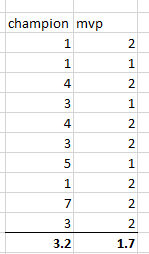

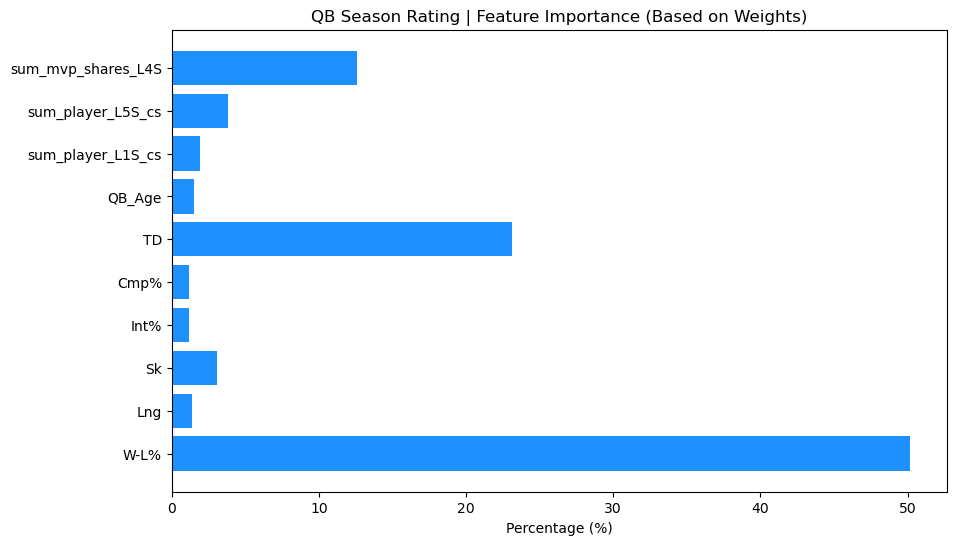

sum_mvp_shares_L4S: 12.62%
sum_player_L5S_cs: 3.86%
sum_player_L1S_cs: 1.93%
QB_Age: 1.54%
TD: 23.15%
Cmp%: 1.16%
Int%: 1.16%
Sk: 3.09%
Lng: 1.35%
W-L%: 50.15%


In [3]:

# Define the features and their associated weights
features = ['sum_mvp_shares_L4S', 'sum_player_L5S_cs', 'sum_player_L1S_cs', 'QB_Age', 'TD', 'Cmp%', 'Int%', 'Sk', 'Lng', 'W-L%']
weights = [1.635, 0.5, 0.25, 0.2, 3, 0.15, -0.15, -0.4, 0.175, 6.5]

# Make all weights absolute for visualization
abs_weights = np.abs(weights)

# Calculate percentage for each weight
total_weight = np.sum(abs_weights)
percent_weights = (abs_weights / total_weight) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features, percent_weights, color='dodgerblue')
plt.xlabel('Percentage (%)')
plt.title('QB Season Rating | Feature Importance (Based on Weights)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Display the percentage weights for each feature
for feature, percent in zip(features, percent_weights):
    print(f'{feature}: {percent:.2f}%')


### QB Season Rating - Old Code

In [235]:
### QB Formula Storage
top_players_passing_data['QB_sea_rating_custom'] = (
    (top_players_passing_data['sum_mvp_shares_L4S'] * 0.082751021052803) +
    (top_players_passing_data['sum_player_L5S_cs'] * 0.00519632374287804) +
    (top_players_passing_data['QB_Age'] * -0.00114810091344997) +
    (top_players_passing_data['TD'] * 0.0051369551216761) +
    (top_players_passing_data['Cmp%'] * -0.000238361818747079) +
    (top_players_passing_data['Int%'] * -0.000975107942582271) +
    (top_players_passing_data['Sk'] * -0.0000283504338234001) + 90
)



# Step 1: Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Step 2: Fit and transform the required columns using MinMaxScaler
columns_to_scale = ['sum_mvp_shares_L4S', 'sum_player_L5S_cs', 'QB_Age', 'TD', 'Cmp%', 'Int%', 'Sk']
top_players_passing_data[columns_to_scale] = scaler.fit_transform(top_players_passing_data[columns_to_scale])

# Step 3: Calculate the custom rating using the scaled values
top_players_passing_data['QB_sea_rating_custom'] = (
    (top_players_passing_data['sum_mvp_shares_L4S'] * 3.5) +
    (top_players_passing_data['sum_player_L5S_cs'] * 3) +
    (top_players_passing_data['QB_Age'] * 1) +
    (top_players_passing_data['TD'] * 2.5) +
    (top_players_passing_data['Cmp%'] * 3) +
    (top_players_passing_data['Int%'] * -1) +
    (top_players_passing_data['Sk'] * -2) + 90
)

# Step 4: Reverse the Min-Max scaling (Inverse Transform)
# Use the same scaler object to reverse the scaling of the specified columns
top_players_passing_data[columns_to_scale] = scaler.inverse_transform(top_players_passing_data[columns_to_scale])



In [236]:
print(list(top_players_passing_data))

['season', 'Player', 'Tm', 'Pos', 'team_id', 'playoff_games', 'champion', 'champion_share', 'mvp_shares', 'dpoy_shares', 'opoy_shares', 'all_pro', 'cpoy_shares', 'sum_QB_mvp_shares', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_all_pro', 'sum_cpoy_shares', 'sum_champion_shares', 'sum_champions', 'sum_QB_playoff_games', 'sum_mvp_shares_L4S', 'sum_dpoy_shares_L4S', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs', 'sum_player_L8S_cs', 'G', 'GS', 'QB_Age', 'QBR', 'TD', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'Sk', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'SRS', 'W-L%', 'MoV', 'SoS', 'sum_career_GWD', 'sum_career_4QC', 'sum_career_TD', 'avg_career_GWD', 'avg_career_4QC', 'avg_career_TD', 'QB_sea_rating_custom', 'QBSRC_rk']


In [86]:
top_players_passing_data.to_csv('QB_db.csv', index=False, encoding="utf-8-sig")

### Merging Team Starting QB Features into Team Database

In [87]:

# Step 2: Merge the specified columns from 'all_coaches_data' into 'all_team_advance_data'
all_team_advance_data = all_team_advance_data.merge(
    top_players_passing_data[['team_id', 'season', 'sum_QB_playoff_games', 'QB_Age', 'sum_QB_mvp_shares', 'QBSRC_rk', 'Player']],
    on=['team_id', 'season'],
    how='left'
)

# Rename the 'Player' column to 'quarterback' in the DataFrame 'all_team_advanced_data'
all_team_advance_data.rename(columns={'Player': 'Quarterback'}, inplace=True)

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])
all_team_advance_data

,season,Team,W,L,W-L%,PF,PA,PD,MoV,SoS,...,40_50+_perc_x_makes,Scoring_FG%,Scoring_Lng,Scoring_XP%,break_even_over500_PD,sum_QB_playoff_games,QB_Age,sum_QB_mvp_shares,QBSRC_rk,Quarterback
0,2024,Kansas City Chiefs,6,0,1.0000,146,103,43,7.2,2.5,...,1.800000,0.857,53.0,0.933,1,23.0,29.0,1.864,1.0,QB Patrick Mahomes
1,2024,Buffalo Bills,5,2,0.7140,199,136,63,9.0,-3.5,...,1.500000,0.786,50.0,0.917,0,10.0,28.0,0.542,7.0,QB Josh Allen
2,2024,Pittsburgh Steelers,5,2,0.7140,161,101,60,8.6,0.0,...,10.083333,0.950,57.0,1.000,1,0.0,25.0,0.002,10.0,QB Justin Fields
3,2024,Houston Texans,5,2,0.7140,165,159,6,0.9,0.0,...,10.285714,0.889,59.0,1.000,0,2.0,23.0,0.008,9.0,QB C.J. Stroud
4,2024,Baltimore Ravens,4,2,0.6670,177,149,28,4.7,0.9,...,2.285714,0.769,56.0,1.000,1,9.0,27.0,1.986,5.0,QB Lamar Jackson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,1990,Phoenix Cardinals,5,11,0.3125,268,396,-128,-8.0,1.3,...,2.083333,0.630,50.0,1.000,0,0.0,24.0,0.000,24.0,QB Timm Rosenbach
1085,1990,Los Angeles Rams,5,11,0.3125,345,412,-67,-4.2,-0.1,...,1.000000,0.625,46.0,0.977,0,0.0,27.0,0.000,18.0,QB Jim Everett
1086,1990,Atlanta Falcons,5,11,0.3125,348,365,-17,-1.1,-1.1,...,3.555556,0.667,53.0,1.000,1,0.0,25.0,0.000,19.0,QB Chris Miller
1087,1990,Cleveland Browns,3,13,0.1875,228,462,-234,-14.6,1.7,...,2.285714,0.700,47.0,0.889,0,0.0,27.0,0.000,26.0,QB Bernie Kosar


In [88]:
all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])
all_team_advance_data['champion_share'] = all_team_advance_data['champion_share'].fillna(0)
all_team_advance_data['champion'] = all_team_advance_data['champion'].fillna(0)

#creating franchise stats-ja
all_team_advance_data = all_team_advance_data.sort_values(by='season', ascending=False)

#function to calculate the rolling sum for the last N seasons excluding the current season-ja
def calculate_rolling_sum(df, column, new_column, window):
    rolling_sums = df.groupby('Team')[column].apply(lambda x: x.shift(1).rolling(window=window, min_periods=1).sum())
    df[new_column] = rolling_sums.reset_index(level=0, drop=True)
    df[new_column] = df[new_column].fillna(0)
    return df

#sort the DataFrame by 'Player' and 'season' in ascending order-ja
all_team_advance_data = all_team_advance_data.sort_values(by=['Team', 'season'])

#calculate the rolling sums-ja
all_team_advance_data = calculate_rolling_sum(all_team_advance_data, 'champion_share', 'sum_franchise_L1S_cs', 1)
all_team_advance_data = calculate_rolling_sum(all_team_advance_data, 'champion_share', 'sum_franchise_L3S_cs', 3)
all_team_advance_data = calculate_rolling_sum(all_team_advance_data, 'champion_share', 'sum_franchise_L5S_cs', 5)
all_team_advance_data = calculate_rolling_sum(all_team_advance_data, 'champion_share', 'sum_franchise_L8S_cs', 8)

#sort the DataFrame back by 'season' in descending order-ja
all_team_advance_data = all_team_advance_data.sort_values(by='season', ascending=False)

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

all_team_advance_data = all_team_advance_data.sort_values(by=['W-L%', 'season'], ascending=[False, False])

all_team_advance_data['champion_share'] = all_team_advance_data['champion_share'].fillna(0)
all_team_advance_data['champion'] = all_team_advance_data['champion'].fillna(0)

#sort the DataFrame by 'Player' and 'season' in descending order-ja
all_team_advance_data = all_team_advance_data.sort_values(by=['season','W-L%'], ascending=[False, False])

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Create 'QB_2_or_more_GWD' column
all_team_advance_data['QB_2_or_more_GWD'] = (all_team_advance_data['passing_offense_GWD'] >= 2).astype(int)

# Create '500_rec_7pt_or_less' column
all_team_advance_data['500_rec_7pt_or_less'] = (all_team_advance_data['rec_7pt_or_less'] >= 0.5).astype(int)

# Create '500_rec_7pt_or_less' column
all_team_advance_data['625_rec'] = (all_team_advance_data['W-L%'] >= 0.625).astype(int)

all_team_advance_data['SRS_greater_than_1.5_pts'] = (all_team_advance_data['SRS'] >= 1.5).astype(int)

In [92]:
all_team_advance_data['champion_share'] = all_team_advance_data['champion_share'].fillna(0)
all_team_advance_data['champion'] = all_team_advance_data['champion'].fillna(0)

# Convert columns to numeric, forcing errors to NaN
all_team_advance_data['40_50+_perc_x_makes'] = pd.to_numeric(all_team_advance_data['40_50+_perc_x_makes'], errors='coerce')
all_team_advance_data['sum_mvp_shares'] = pd.to_numeric(all_team_advance_data['sum_mvp_shares'], errors='coerce')
all_team_advance_data['sum_franchise_L1S_cs'] = pd.to_numeric(all_team_advance_data['sum_franchise_L1S_cs'], errors='coerce')
all_team_advance_data['sum_dpoy_shares'] = pd.to_numeric(all_team_advance_data['sum_dpoy_shares'], errors='coerce')
all_team_advance_data['sum_opoy_shares'] = pd.to_numeric(all_team_advance_data['sum_opoy_shares'], errors='coerce')
all_team_advance_data['Scoring_FG%'] = pd.to_numeric(all_team_advance_data['Scoring_FG%'], errors='coerce')
all_team_advance_data['W'] = pd.to_numeric(all_team_advance_data['W'], errors='coerce')

# Fill NaN values that might have been introduced with 0
all_team_advance_data = all_team_advance_data.fillna(0)

# Step 1: Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Step 2: Fit and transform the required columns using MinMaxScaler
columns_to_scale = ['40_50+_perc_x_makes', 'sum_mvp_shares', 'sum_franchise_L1S_cs','sum_dpoy_shares', 'sum_opoy_shares', 'sum_cpoy_shares','Scoring_FG%', 'W', '625_rec','SRS_greater_than_1.5_pts', 'sum_playoff_games']

# Fit and transform
scaled_values = scaler.fit_transform(all_team_advance_data[columns_to_scale])

# Store the scaled values back in the DataFrame
all_team_advance_data[columns_to_scale] = scaled_values

# Step 3: Perform your operations such as custom rating calculation
all_team_advance_data['team_rating_custom'] = (
    ((all_team_advance_data['40_50+_perc_x_makes'] * 0.4799999999999958) +
    (all_team_advance_data['sum_mvp_shares'] * 2.9763500000000005) +
    (all_team_advance_data['sum_franchise_L1S_cs'] * 0.9999999999999937) +
    (all_team_advance_data['sum_dpoy_shares'] * 1.4129999999999925) +
    (all_team_advance_data['sum_opoy_shares'] * 0.3710999999999902) +
    (all_team_advance_data['sum_cpoy_shares'] * 1.0720000000000038) +
    (all_team_advance_data['Scoring_FG%'] * 0.7499999999999942) +
    (all_team_advance_data['W'] * 8.799999999999978) +
    (all_team_advance_data['625_rec'] * 7) +
    (all_team_advance_data['SRS_greater_than_1.5_pts'] * 7) + 
    (all_team_advance_data['sum_playoff_games'] * 0.18654999999999305)) / 3
)


# Ensure no changes happen between fit_transform and inverse_transform
# Step 4: Reverse the Min-Max scaling (Inverse Transform)
all_team_advance_data[columns_to_scale] = scaler.inverse_transform(all_team_advance_data[columns_to_scale])

all_team_advance_data = all_team_advance_data.sort_values(by=['season','W-L%'], ascending=[False, False])

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

# Filter and display the DataFrame
filtered_df = all_team_advance_data[(all_team_advance_data['season'] == 2023) & (all_team_advance_data['make_playoffs'] == 1)][['season','Team', 'champion_share', 'team_rating_custom','40_50+_perc_x_makes', 'sum_mvp_shares', 
                                                                                                                                'sum_franchise_L1S_cs', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_cpoy_shares','Scoring_FG%', 'W', '625_rec', 
                                                                                                                                'SRS_greater_than_1.5_pts', 'sum_playoff_games']].sort_values(by='team_rating_custom', ascending=False)
filtered_df

,season,Team,champion_share,team_rating_custom,40_50+_perc_x_makes,sum_mvp_shares,sum_franchise_L1S_cs,sum_dpoy_shares,sum_opoy_shares,sum_cpoy_shares,Scoring_FG%,W,625_rec,SRS_greater_than_1.5_pts,sum_playoff_games
39,2023,Kansas City Chiefs,1.00,7.866217,12.000000,1.840,1.00,0.224,1.160,0.004,0.943,11.0,1.0,1.0,364.0
33,2023,San Francisco 49ers,0.75,7.584367,4.000000,0.040,0.50,0.948,0.284,0.440,0.840,12.0,1.0,1.0,274.0
32,2023,Baltimore Ravens,0.50,7.576237,8.470588,1.000,0.00,0.000,0.340,0.004,0.865,13.0,1.0,1.0,161.0
34,2023,Dallas Cowboys,0.00,7.557200,14.000000,0.024,0.25,0.944,0.000,0.420,0.947,12.0,1.0,1.0,157.0
36,2023,Buffalo Bills,0.25,7.195339,5.333333,0.382,0.25,0.420,0.088,0.004,0.828,11.0,1.0,1.0,299.0
35,2023,Detroit Lions,0.50,7.154933,1.000000,0.000,0.00,0.000,0.000,0.080,1.000,12.0,1.0,1.0,88.0
38,2023,Cleveland Browns,0.00,7.044024,15.428571,0.000,0.00,0.068,0.000,0.016,0.917,11.0,1.0,1.0,121.0
37,2023,Miami Dolphins,0.00,6.983361,8.066667,0.004,0.00,0.060,0.172,0.000,0.857,11.0,1.0,1.0,116.0
40,2023,Philadelphia Eagles,0.00,5.078578,13.066667,0.388,0.75,0.076,0.264,0.084,0.938,11.0,1.0,0.0,222.0
43,2023,Los Angeles Rams,0.00,5.016617,6.250000,0.060,0.00,2.890,0.700,0.460,0.739,10.0,0.0,1.0,166.0


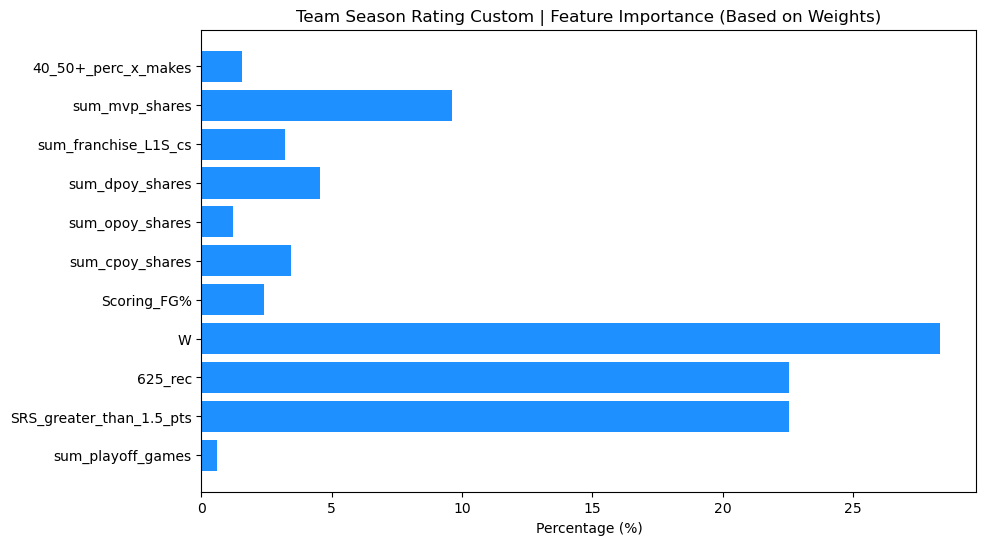

40_50+_perc_x_makes: 1.55%
sum_mvp_shares: 9.60%
sum_franchise_L1S_cs: 3.19%
sum_dpoy_shares: 4.54%
sum_opoy_shares: 1.19%
sum_cpoy_shares: 3.45%
Scoring_FG%: 2.42%
W: 28.33%
625_rec: 22.56%
SRS_greater_than_1.5_pts: 22.56%
sum_playoff_games: 0.61%


In [4]:

# Define the features and their associated weights
features = ['40_50+_perc_x_makes', 'sum_mvp_shares', 'sum_franchise_L1S_cs', 'sum_dpoy_shares', 'sum_opoy_shares', 'sum_cpoy_shares','Scoring_FG%', 'W', '625_rec', 'SRS_greater_than_1.5_pts', 'sum_playoff_games']
weights = [.48,2.98,.99,1.41,.37,1.07,.75,8.79,7,7,.19]

# Make all weights absolute for visualization
abs_weights = np.abs(weights)

# Calculate percentage for each weight
total_weight = np.sum(abs_weights)
percent_weights = (abs_weights / total_weight) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features, percent_weights, color='dodgerblue')
plt.xlabel('Percentage (%)')
plt.title('Team Season Rating Custom | Feature Importance (Based on Weights)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Display the percentage weights for each feature
for feature, percent in zip(features, percent_weights):
    print(f'{feature}: {percent:.2f}%')


### Team Rating Custom - Old Code

In [ ]:
all_team_advance_data['team_rating_custom'] = (
    (all_team_advance_data['40_50+_perc_x_makes'] * .02) +
    (all_team_advance_data['sum_mvp_shares'] * .65) +
    (all_team_advance_data['sum_franchise_L1S_cs'] * 1) +
    (all_team_advance_data['sum_dpoy_shares'] * .45) +
    (all_team_advance_data['sum_opoy_shares'] * .15) +
    (all_team_advance_data['sum_cpoy_shares'] * .8)+
    (all_team_advance_data['Scoring_FG%'] * 0.75) +
    (all_team_advance_data['W'] * .55) +
    (all_team_advance_data['625_rec'] * 4) +
    (all_team_advance_data['SRS_greater_than_1.5_pts'] * 4) + 
    (all_team_advance_data['sum_playoff_games'] * .00035)
)

7
7

### Export & Adding in Some Ranking Features

In [94]:
# Add +1 to all values in the 'season' column
all_team_advance_data['season'] = all_team_advance_data['season'] + 1

In [95]:
#7 seed feature
all_team_advance_data['7_seed'] = all_team_advance_data['seed'].apply(lambda x: 1 if x == 7 else 0)

In [96]:
#list of columns in the desired order-ja
desired_order = [
    'season', 'Team', 'team_id', 'Quarterback', 'conference', 'divisions', 'round','champion_share',
    'champion'
]

#append the remaining columns to the desired order-ja
remaining_columns = [col for col in all_team_advance_data.columns if col not in desired_order]
final_order = desired_order + remaining_columns

#reorder the DataFrame-ja
all_team_advance_data = all_team_advance_data[final_order]

all_team_advance_data = all_team_advance_data.sort_values(by=['season', 'W-L%'], ascending=[False, False])

all_team_advance_data.to_csv('NFL Champion RawData.csv', index=False, encoding="utf-8-sig")
print(list(all_team_advance_data))

['season', 'Team', 'team_id', 'Quarterback', 'conference', 'divisions', 'round', 'champion_share', 'champion', 'W', 'L', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS', 'DSRS', 'make_playoffs', 'seed', '1_seed', '2_seed', '3_seed', '4_seed', '5_seed', '6_seed', 'playoff_games', 'playoff_wins', 'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot Yds & TO_Cmp', 'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 'team_offense_Passing_1stD', 'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD', 'team_offense_Penalties_Pen', 'team_offense_Penalties_Yds', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 'team_offense_TO%', 'te

In [97]:
df = pd.read_csv("NFL Champion RawData.csv")
df = df.fillna(0)

exclude_columns = ['season','Team', 'team_id','Quarterback', 'QBSRC_rk','conference', 'divisions', 'round','champion', 'champion_share', 'seed', '1_seed', '2_seed', '3_seed', '4_seed', '5_seed', '6_seed', '7_seed', 'playoff_games', 'playoff_wins', '500_rec_7pt_or_less','QB_2_or_more_GWD''625_rec', 'SRS_greater_than_1.5_pts']

reverse_rank_columns = ['pso']

for col in df.columns:
    if col not in exclude_columns:
        if col in reverse_rank_columns:
            df[col] = df.groupby('season')[col].rank(method='min', ascending=True)
        else:
            df[col] = df.groupby('season')[col].rank(method='min', ascending=False)
            
df = df.sort_values(by=['season', 'W-L%'], ascending=[False, True])

df.to_csv("NFL Champion LR Data.csv",index=False, encoding="utf-8-sig")
print(list(df))

['season', 'Team', 'team_id', 'Quarterback', 'conference', 'divisions', 'round', 'champion_share', 'champion', 'W', 'L', 'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS', 'DSRS', 'make_playoffs', 'seed', '1_seed', '2_seed', '3_seed', '4_seed', '5_seed', '6_seed', 'playoff_games', 'playoff_wins', 'team_offense_PF', 'team_offense_Tot Yds & TO_Yds', 'team_offense_Tot Yds & TO_Ply', 'team_offense_Tot Yds & TO_Y/P', 'team_offense_Tot Yds & TO_TO', 'team_offense_Tot Yds & TO_FL', 'team_offense_Tot Yds & TO_1stD', 'team_offense_Tot Yds & TO_Cmp', 'team_offense_Tot Yds & TO_Att', 'team_offense_Passing_Yds', 'team_offense_Passing_TD', 'team_offense_Passing_Int', 'team_offense_Passing_NY/A', 'team_offense_Passing_1stD', 'team_offense_Passing_Att', 'team_offense_Rushing_Yds', 'team_offense_Rushing_TD', 'team_offense_Rushing_Y/A', 'team_offense_Rushing_1stD', 'team_offense_Penalties_Pen', 'team_offense_Penalties_Yds', 'team_offense_Penalties_1stPy', 'team_offense_Sc%', 'team_offense_TO%', 'te

In [98]:

columns_to_merge = {
    'team_rating_custom': 'rank_team_rating_custom',
}
df_to_merge = df[['season', 'team_id'] + list(columns_to_merge.keys())].rename(columns=columns_to_merge)


all_team_advance_data = pd.merge(
    all_team_advance_data,
    df_to_merge,
    on=['team_id', 'season'],
    how='left'
)

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

all_team_advance_data['top_5_team_rating_custom'] = all_team_advance_data['rank_team_rating_custom'].apply(lambda x: 1 if x <= 5 else 0)
all_team_advance_data['top_7_QBSRC'] = all_team_advance_data['QBSRC_rk'].apply(lambda x: 1 if x <= 7 else 0)

all_team_advance_data = all_team_advance_data.drop_duplicates(subset=['team_id', 'season'])

all_team_advance_data = all_team_advance_data.sort_values(by=['W-L%'], ascending=[False])
all_team_advance_data = all_team_advance_data.sort_values(by=['season'], ascending=[False])

all_team_advance_data.to_csv('NFL Champion RawData.csv', index=False, encoding="utf-8-sig")